In [1]:
import sys
sys.executable

'/sw/buster-x64/anaconda3-2020.02/bin/python'

In [2]:
%matplotlib widget
import os
import copy
import numpy as np

import netCDF4 as cdf
import json

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import oceantracker.post_processing.particlePlot as otPlot
import oceantracker.util.rUtil  as rUtil
import oceantracker.post_processing.loadOutputFiles as loadOutputFiles

ModuleNotFoundError: No module named 'ipympl'

## Screen Input Data

In [7]:
data = cdf.Dataset('/scratch/local1/hzg/schout_100.nc')
data.close

<function Dataset.close>

In [12]:
%matplotlib qt

data = cdf.Dataset('/home/ls/data/estuar/hzg/schout_100.nc')

x = data.variables['SCHISM_hgrid_node_x'][:]
y = data.variables['SCHISM_hgrid_node_y'][:]
tri = data.variables['SCHISM_hgrid_face_nodes'][:]
tri = np.array(tri[:,:3]) - 1
salt = data.variables['salt'][:,:,0]
salt[np.array(salt) == 9.96921e+36] = np.nan
salt = np.average(salt,axis=0)

plt.xlabel('Longitude [m]')
plt.ylabel('Lattitude [m]')

triang = matplotlib.tri.Triangulation(x,y,tri)
plt.tripcolor(triang,salt,aa=True,cmap='viridis')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('Salinity [PSU]', rotation=-90)

plt.tight_layout()
data.close()

In [19]:
%matplotlib qt
otPlot.plot_grid_interactive('/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C04R00')

## Testing passive particles

In [2]:
!/usr/bin/python /home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py --param_file /home/ls/Documents/scr/phd/bicest/oceantracker02/demos/initial_3d_100d_elbe_test.json

Namespace(param_file='/home/ls/Documents/scr/phd/bicest/oceantracker02/demos/initial_3d_100d_elbe_particle_splitting.json', input_folder=None, output_folder=None, processors=None, replicates=None, duration=None, cases=None, debug=False)
Sorting files into order based on hindcast time variable
^C
Traceback (most recent call last):
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py", line 47, in <module>
    ot.run(params)
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/oceantrackersim.py", line 128, in run
    ot.run(c)
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/oceantrackersim.py", line 338, in run
    self.do_a_run(run_params['sorted_hindcast_file_list'])
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/oceantrackersim.py", line 353, in do_a_run
    self.build_compulsory_instances()
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/oceantrackersim.py", line 478, in bui

In [9]:
%matplotlib qt
log = log = rUtil.read_JSON( '/home/ls/data/estuar/output_caseInfo.json')

ax=[440000, 600000, 5910000,6010000]
anim = otPlot.animate_particles(log['info']['tracks_writer']['file_name'], axes=ax)

#vid = anim.to_html5_video()
## Call function to display the animation
#HTML(vid)

## Testing particle splitting and culling

In [7]:
os.system('/usr/bin/python /home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py --param_file /home/ls/Documents/scr/phd/bicest/oceantracker02/demos/initial_3d_100d_elbe_particle_splitting.json')

0

In [1]:
!/usr/bin/python /home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py --param_file /home/ls/Documents/scr/phd/bicest/oceantracker02/demos/initial_3d_100d_elbe_particle_splitting.json

f78c96edb20> Unexpected parameter "__comment" not in defaults: class  <PolygonRelease>   module <oceantracker.particle_release.polygonRelease>
Run ended, processID=0, run time-0:01:10.671249, Output file base= /home/ls/data/estuar/output/initial_3d_100d_elbe_particle_splitting
------------------------------
Total Run Time 0:01:12.508893,  /home/ls/data/estuar/output


(0, 5, 5)


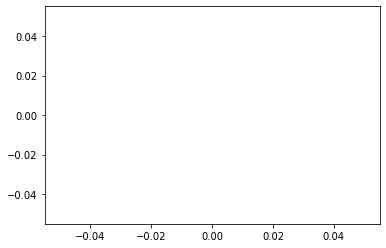

In [3]:
%matplotlib inline
stats = cdf.Dataset('/home/ls/data/estuar/output/initial_3d_100d_elbe_particle_splitting_stats_polygon_age_00.nc')
for ii in np.arange(1,5):
    plt.plot(stats.variables['count'][:,0,ii])
stats.close()

%matplotlib qt
log = rUtil.read_JSON( '/home/ls/data/estuar/output/initial_3d_100d_elbe_particle_splitting_caseInfo.json')

ax=[440000, 600000, 5910000,6010000]
anim = otPlot.animate_particles(log['info']['tracks_writer']['file_name'], axes=ax)


## Accuracy test

In [3]:
!/usr/bin/python /home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py --param_file /home/ls/Documents/scr/phd/bicest/oceantracker02/demos/initial_3d_100d_elbe_accuracy_test.json

Namespace(param_file='/home/ls/Documents/scr/phd/bicest/oceantracker02/demos/initial_3d_100d_elbe_accuracy_test.json', input_folder=None, output_folder=None, processors=None, replicates=None, duration=None, cases=None, debug=False)
Sorting files into order based on hindcast time variable
^C
Traceback (most recent call last):
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py", line 45, in <module>
    ot.run(params)
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/oceantrackersim.py", line 117, in run
    sort_file_list, reader_params = self._build_sorted_hindcast_files(params_dict['reader'], sparams['input_folder'])
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/oceantrackersim.py", line 211, in _build_sorted_hindcast_files
    file_info=reader.sort_files(input_folder)
  File "/home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/readers/_readerBase.py", line 83, in sort_files
    nc=NetCDFhandler(fn,'r')


/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C01R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C02R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C03R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C04R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C05R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C06R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C07R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C08R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C09R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C10R00_stats_polygon_age_00.nc
/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_te

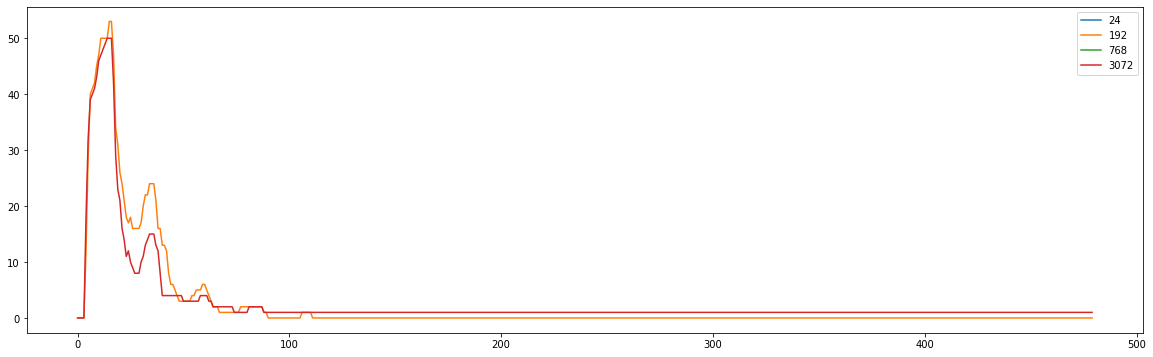

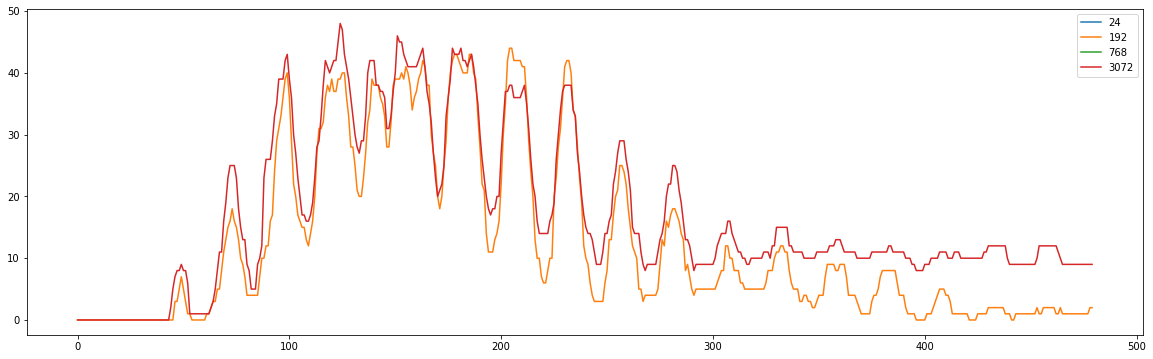

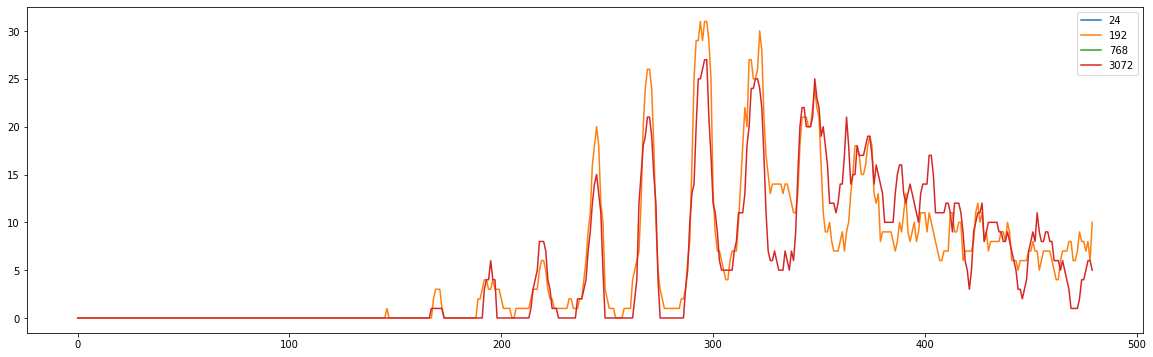

In [27]:
%matplotlib inline
parent_path = '/home/ls/data/estuar/output/'
accuracy_track_files = [os.path.join(parent_path,file) for file in os.listdir(parent_path) if ('accuracy_test' in file) and ('stats_polygon_age_00.nc' in file)]
accuracy_track_files.sort()
[print(item) for item in accuracy_track_files]

substeps = [3*2**ii for ii in np.arange(0,11)]

plt.figure(figsize=(20,6))
for jj,file in enumerate(accuracy_track_files):
    try:
        stats = cdf.Dataset(file)
        plt.plot(stats.variables['count'][:,0,1],label=substeps[jj])
        plt.legend()
        stats.close()
    except:
        pass

plt.figure(figsize=(20,6))
for jj,file in enumerate(accuracy_track_files):
    try:
        stats = cdf.Dataset(file)
        plt.plot(stats.variables['count'][:,0,2],label=substeps[jj])
        plt.legend()
        stats.close()
    except:
        pass

plt.figure(figsize=(20,6))
for jj,file in enumerate(accuracy_track_files):
    try:
        stats = cdf.Dataset(file)
        plt.plot(stats.variables['count'][:,0,3],label=substeps[jj])
        plt.legend()
        stats.close()
    except:
        pass


In [32]:
stats = cdf.Dataset('/home/ls/data/estuar/output/initial_3d_100d_elbe_accuracy_test_C09R00_stats_polygon_age_00.nc')
stats.variables['count']

<class 'netCDF4._netCDF4.Variable'>
int32 count(time, releaseGroups, polygon)
    _FillValue: -127
    notes: counts of particles in each polygon at given times, for each release group
unlimited dimensions: time
current shape = (0, 5, 5)
filling on

## Testing Culling when Standed

## Testing Culling when out of concentration range

## Testing polygons

In [6]:
%run ../oceantracker/runOT.py --param_file experiment1_dead_v8.json --duration 60

Namespace(cases=None, debug=False, duration=60.0, input_folder=None, output_folder=None, param_file='experiment1_dead_v8.json', processors=None, replicates=None)
Sorting files into order based on hindcast time variable
opening tracks output to : /scratch/local1/output/experiment1_v8/experiment1_tracks_Working.nc
Starting experiment1,  duration:  0.0 days
Read-P000: file-schout_100.nc,Size   24 file offsets-   0:  23 buffer offsets-   0:  23 Required:  24  Read:  24  time:1081  ms 
 P000:00%:000000:00:f00:b000:Day +00 00:00 2012-04-09T01:00:00: Rel.:000113: Active:00113 M:00062 S:00000 B:00051 D:000 Buffer: 113- 56% Writes    1 Step-  21 ms
 P000:17%:000001:01:f00:b000:Day +00 00:00 2012-04-09T01:00:10: Rel.:000113: Active:00113 M:00056 S:00002 B:00055 D:000 Buffer: 113- 56% Writes    2 Step-   2 ms
 P000:33%:000002:02:f00:b000:Day +00 00:00 2012-04-09T01:00:20: Rel.:000113: Active:00113 M:00063 S:00001 B:00049 D:000 Buffer: 113- 56% Writes    3 Step-   2 ms
 P000:50%:000003:03:f00:b000

In [10]:
otPlot.plot_tracks('/scratch/local1/output/experiment1_v9/experiment1_runInfo.json')

TypeError: string indices must be integers

## testing proper run

In [7]:
!/usr/bin/python /home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py --param_file /home/ls/Documents/scr/phd/bicest/oceantracker02/experiments/experiment1_alive_splitting_stranded_concentrion_culling.json --duration 1000000

at 2012-04-17T17:47:40: class  <ParticleGroup>   module <oceantracker.particleGroupManager>

------------------------------
Total Run Time 0:35:49.299803,  /home/ls/data/estuar/output/experiment1


In [1]:
%matplotlib qt
log = log = rUtil.read_JSON('/home/ls/data/estuar/output/experiment1_v2/experiment1_caseInfo.json')
ax=[440000, 600000, 5910000,6010000]
anim = otPlot.animate_particles(log['info']['tracks_writer']['file_name'],axes=ax)

NameError: name 'rUtil' is not defined

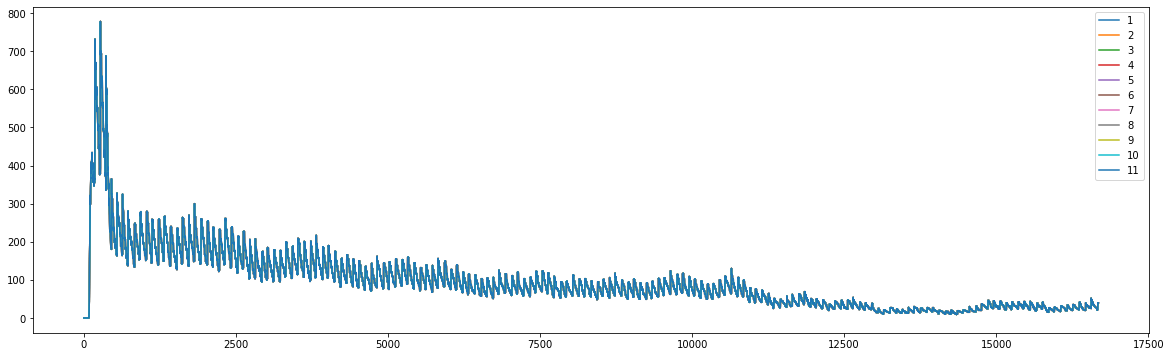

In [11]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1/experiment1_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(np.sum(stats.variables['count'][:,0,:],axis=1),label=ii)
plt.legend()
stats.close()

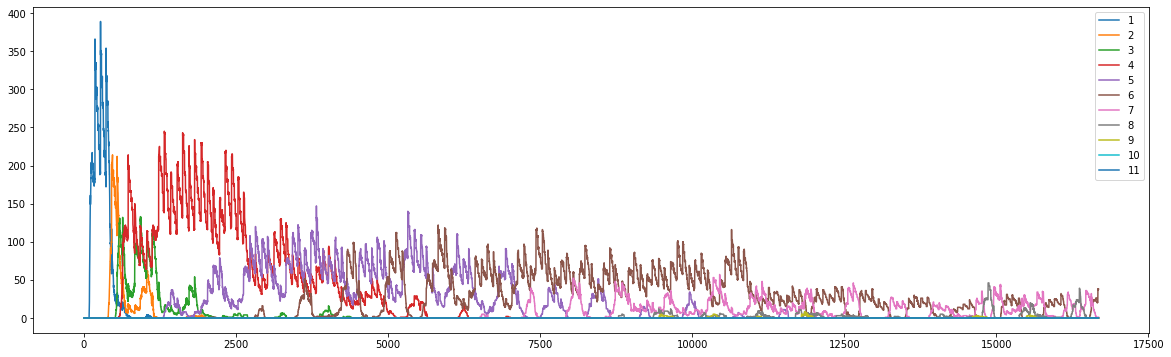

In [9]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1/experiment1_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

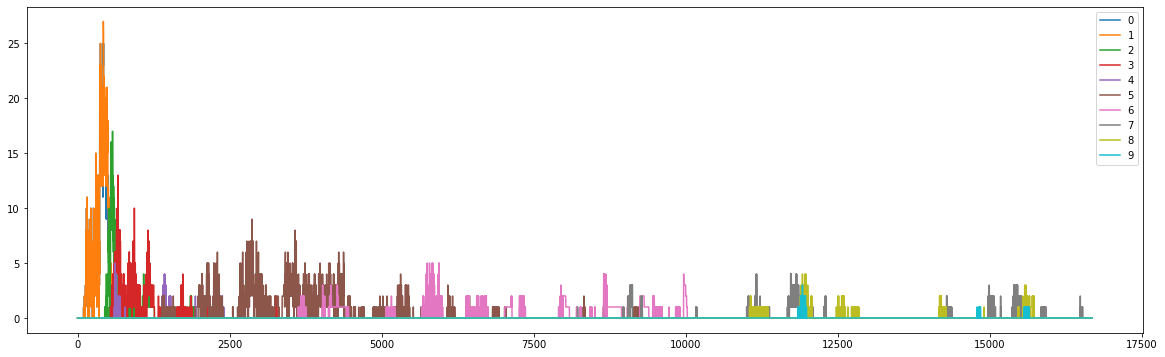

In [6]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1/experiment1_stats_polygon_age_01.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(0,10):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

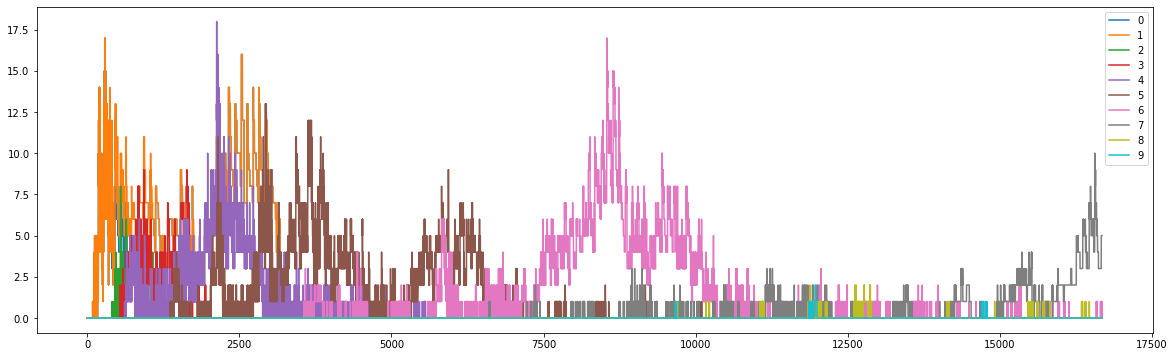

In [8]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1/experiment1_stats_polygon_age_02.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(0,10):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

## experiment 1 v2

In [12]:
!/usr/bin/python /home/ls/Documents/scr/phd/bicest/oceantracker02/oceantracker/runOT.py --param_file /home/ls/Documents/scr/phd/bicest/oceantracker02/experiments/experiment1_alive_splitting_stranded_concentrion_culling_v2.json --duration 1000000

fer- no more releases, increase parameter "particle_buffer_size", size=1000 at 2012-04-14T19:15:00: class  <ParticleGroup>   module <oceantracker.particleGroupManager>
Run ended, processID=0, run time-0:30:18.400902, Output file base= /home/ls/data/estuar/output/experiment1_v2/experiment1
------------------------------
Total Run Time 0:30:23.347468,  /home/ls/data/estuar/output/experiment1_v2


No handles with labels found to put in legend.


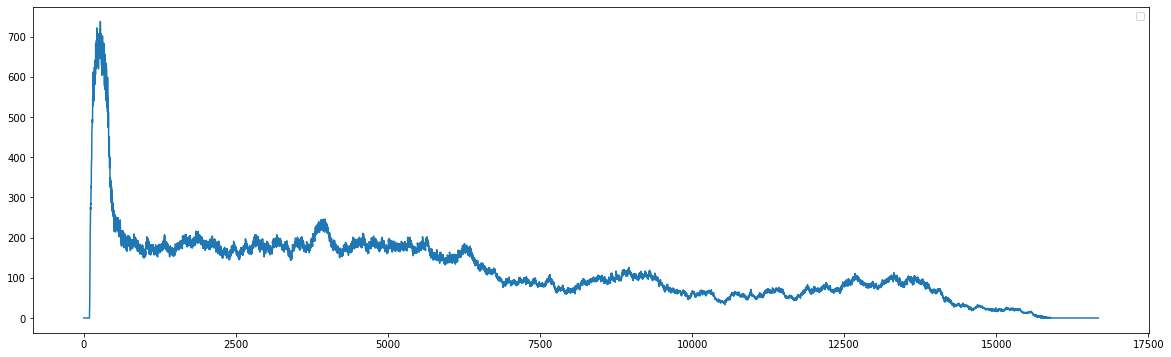

In [18]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1_v2/experiment1_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
plt.plot(np.sum(stats.variables['count'][:,0,:],axis=1))
plt.legend()
stats.close()

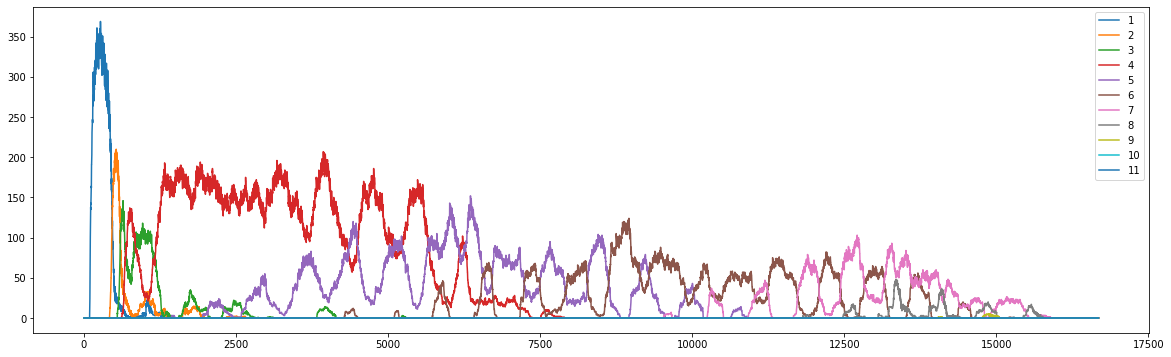

In [15]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1_v2/experiment1_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

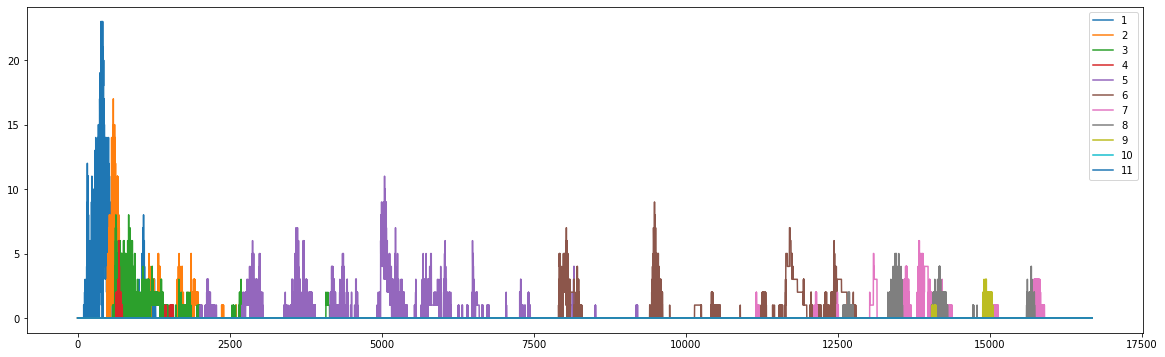

In [16]:
%matplotlib inline
file = '/home/ls/data/estuar/output/experiment1_v2/experiment1_stats_polygon_age_01.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

## experiment 1 v3

In [23]:
!ls 

experiment1_alive_splitting_stranded_concentrion_culling.json
experiment1_alive_splitting_stranded_concentrion_culling_v2.json
experiment1_alive_splitting_stranded_culling_v3.json
initial_3d_elbe_accuracy_test.json
initial_3d_elbe_particle_splitting.json
initial_3d_elbe_test.json
initial_experiments.ipynb
testing_polygons.json
testing_salt_dependent_culling.json
testing_stranding_dependent_culling.json


## 1.4

In [9]:
%run ../oceantracker/runOT.py --param_file experiment1_alive_splitting_stranded_culling_v4.json --duration 2000000

Namespace(cases=None, debug=False, duration=2000000.0, input_folder=None, output_folder=None, param_file='experiment1_alive_splitting_stranded_culling_v4.json', processors=None, replicates=None)
Sorting files into order based on hindcast time variable


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


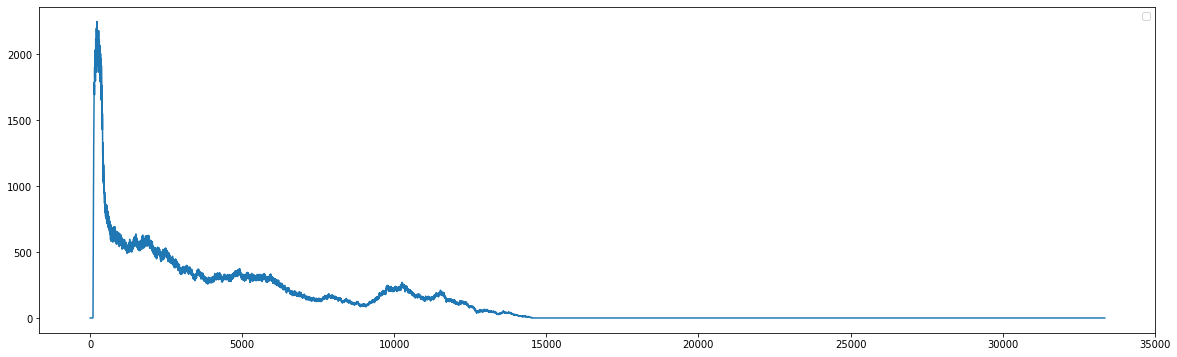

In [12]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v4/experiment1_C00R00_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
plt.plot(np.sum(stats.variables['count'][:,0,:],axis=1))
plt.legend()
stats.close()

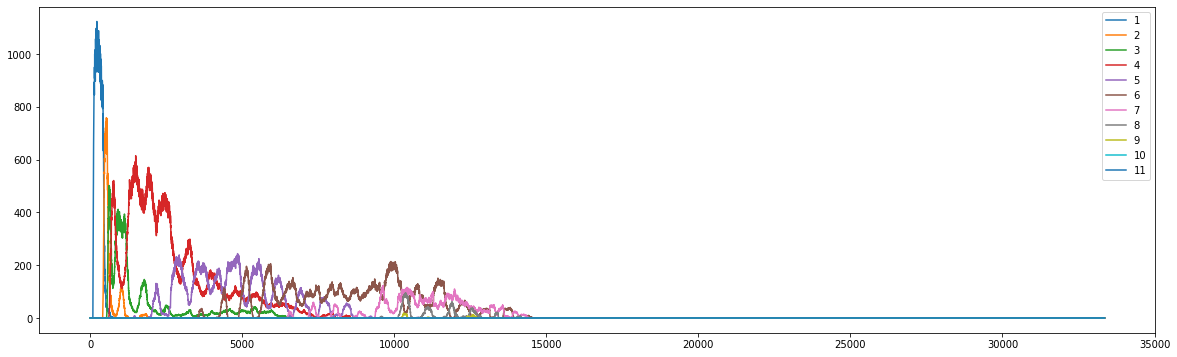

In [19]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v4/experiment1_C00R00_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file
for ii in np.arange(1,11):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

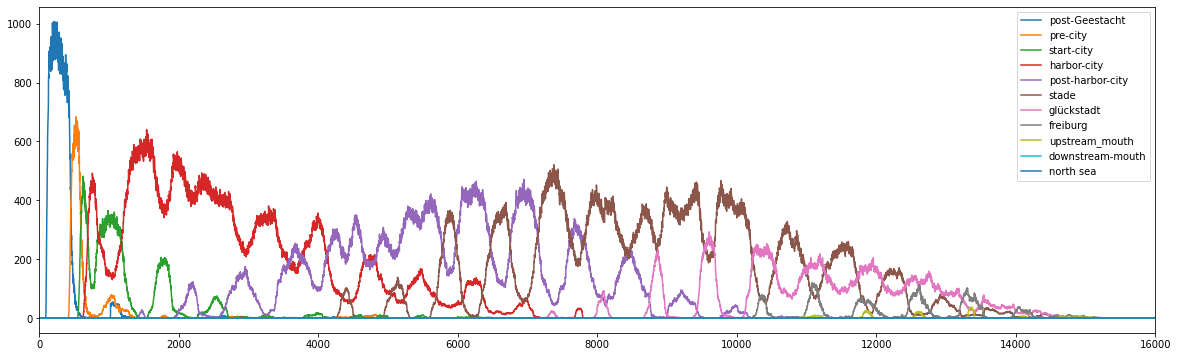

In [3]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v4/experiment1_C01R00_stats_polygon_age_00.nc'

polygons = ["post-Geestacht",
            "pre-city",
            "start-city",
            "harbor-city",
            "post-harbor-city",
            "stade",
            "glückstadt",
            "freiburg",
            "upstream_mouth",
            "downstream-mouth",
            "north sea"]
            
plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=polygons[ii-1])
plt.legend()
plt.xlim(0,16000)
stats.close()

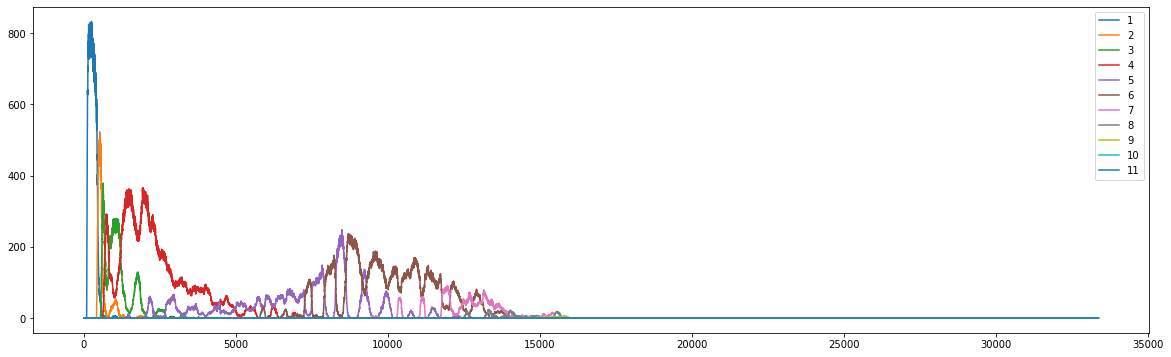

In [20]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v4/experiment1_C02R00_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=ii)
plt.legend()
stats.close()

In [47]:
with open('/scratch/local1/output/experiment1_v4/experiment1_C0R00_caseInfo.json') as file:
    run_meta = json.load(file)

run_meta['timers']

[' 1778.25s-00001:- - total_model_all,  (first call=  1778.25s)',
 ' 1777.40s-00001:- - total_model_run,  (first call=  1777.40s)',
 '  856.88s-200160:- - post_step_bookeeping,  (first call=     1.27s)',
 '  312.57s-200160:- - integration_step,  (first call=     1.28s)',
 '  230.06s-1404124:- - setup_interp_time_step,  (first call=     1.47s)',
 '  224.00s-1404124:- - find_cells_and_weights,  (first call=     1.47s)',
 '  153.29s-1404124:- - find_depth_cell,  (first call=     0.78s)',
 '  138.92s-200160:- - onfly_statistics,  (first call=     0.00s)',
 '   67.71s-1206968:- - eval_interp,  (first call=     0.18s)',
 '   54.22s-200160:- - onfly_statistics-0 : <oceantracker.user_onfly_particle_statistics.PolygonStatistics.PolygonStats2D_timeBased object at 0x7f9755c76910>,  (first call=     0.00s)',
 '   43.80s-200160:- - onfly_statistics-2 : <oceantracker.user_onfly_particle_statistics.PolygonStatistics.PolygonStats2D_timeBased object at 0x7f9755ad1150>,  (first call=     0.00s)',
 '   3

## 1.5

In [3]:
%run ../oceantracker/runOT.py --param_file experiment1_alive_splitting_culling_v5.json

No handles with labels found to put in legend.


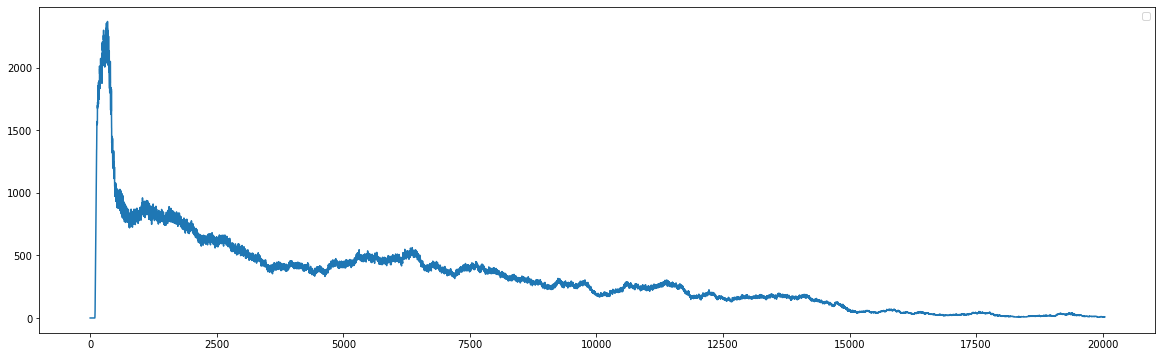

In [6]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v5/experiment1_C00R00_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
plt.plot(np.sum(stats.variables['count'][:,0,:],axis=1))
plt.legend()
stats.close()

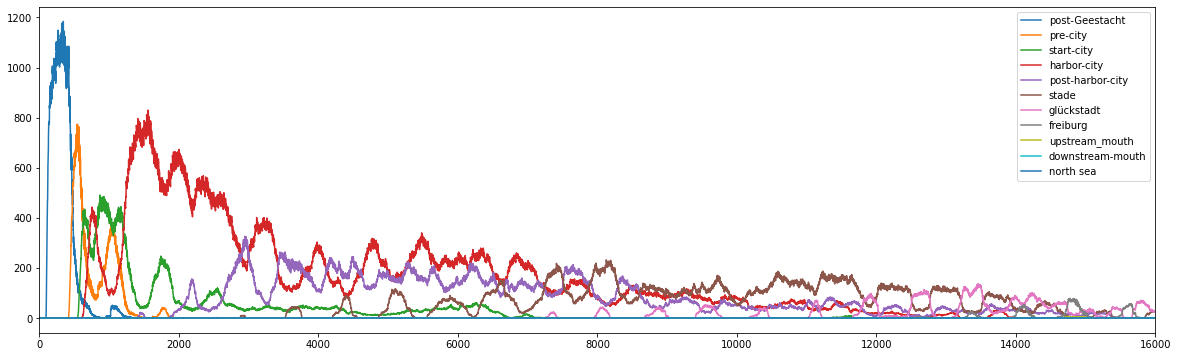

In [8]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v5/experiment1_C00R00_stats_polygon_age_00.nc'

polygons = ["post-Geestacht",
            "pre-city",
            "start-city",
            "harbor-city",
            "post-harbor-city",
            "stade",
            "glückstadt",
            "freiburg",
            "upstream_mouth",
            "downstream-mouth",
            "north sea"]
            
plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=polygons[ii-1])
plt.legend()
plt.xlim(0,16000)
stats.close()

## 1.6

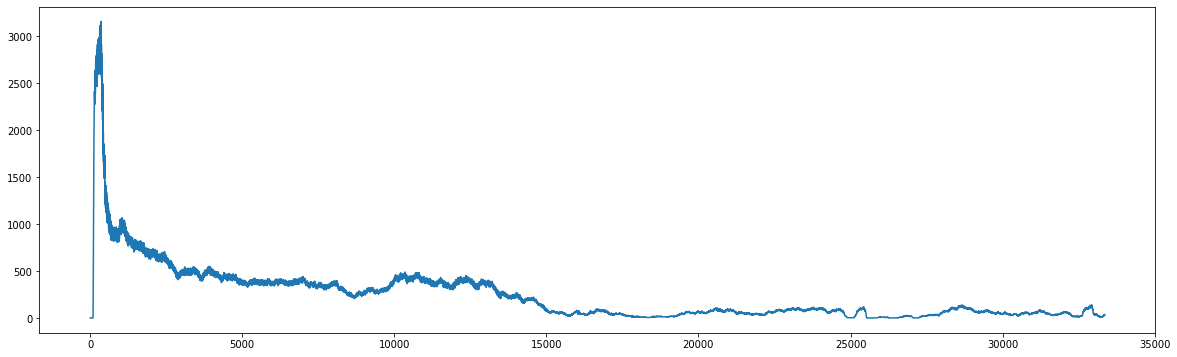

In [15]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v6/experiment1_C00R00_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
plt.plot(np.sum(stats.variables['count'][:,0,:],axis=1))
stats.close()

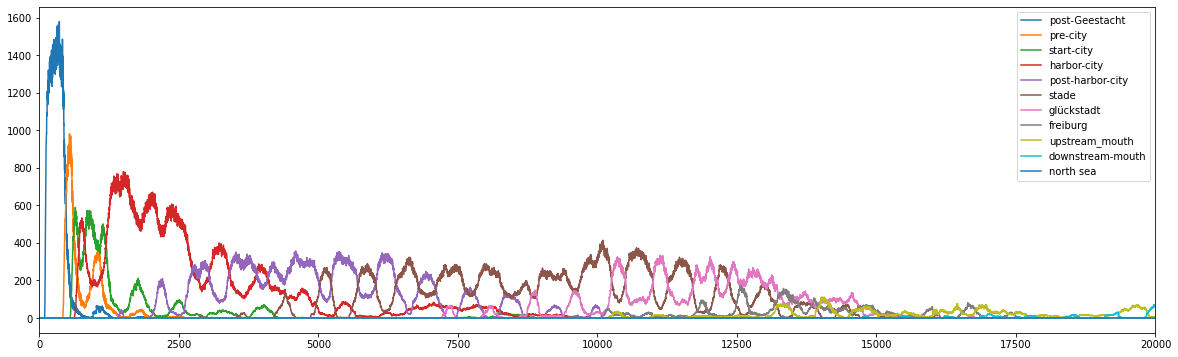

In [29]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v6/experiment1_C00R00_stats_polygon_age_00.nc'

polygons = ["post-Geestacht",
            "pre-city",
            "start-city",
            "harbor-city",
            "post-harbor-city",
            "stade",
            "glückstadt",
            "freiburg",
            "upstream_mouth",
            "downstream-mouth",
            "north sea"]
            
plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=polygons[ii-1])
plt.legend()
plt.xlim(0,20000)
stats.close()

## 1.7

In [7]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v7/experiment1_C00R02_stats_polygon_age_00.nc'

plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
plt.plot(np.sum(stats.variables['count'][:,0,:],axis=1))
stats.close()

OSError: [Errno -101] NetCDF: HDF error: b'/scratch/local1/output/experiment1_v7/experiment1_C00R02_stats_polygon_age_00.nc'

<Figure size 1440x432 with 0 Axes>

In [ ]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v7/experiment1_C00R00_stats_polygon_age_00.nc'

polygons = ["post-Geestacht",
            "pre-city",
            "start-city",
            "harbor-city",
            "post-harbor-city",
            "stade",
            "glückstadt",
            "freiburg",
            "upstream_mouth",
            "downstream-mouth",
            "north sea"]
            
plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)
for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=polygons[ii-1])
plt.legend()
plt.xlim(0,20000)
stats.close()

Error: Session cannot generate requests

## 1.8

In [14]:
import seaborn as sns
import pandas as pd

In [46]:
downsampling_factor = 1

# moving
file = '/scratch/local1/output/experiment1_v8/experiment1_stats_polygon_age_00.nc'
stats = cdf.Dataset(file)
moving = np.sum(stats.variables['count'][::downsampling_factor,0,:],axis=1)
stats.close()
# stranded_by_tide
file = '/scratch/local1/output/experiment1_v8/experiment1_stats_polygon_age_01.nc'
stats = cdf.Dataset(file)
stranded_tide = np.sum(stats.variables['count'][::downsampling_factor,0,:],axis=1)
stats.close()
# stranded_on_bottom
file = '/scratch/local1/output/experiment1_v8/experiment1_stats_polygon_age_02.nc'
stats = cdf.Dataset(file)
stranded_bottom = np.sum(stats.variables['count'][::downsampling_factor,0,:],axis=1)
stats.close()

df = pd.DataFrame({"moving": moving,"tide":stranded_tide,"boundary":stranded_bottom})

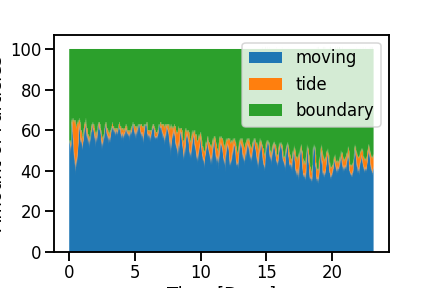

In [53]:
%matplotlib widget
sns.set_context('talk')
fig,ax = plt.subplots()
plt.stackplot(np.arange(len(moving))/60/24,np.swapaxes(np.array(df),0,1),labels=list(df.columns))
plt.xlabel('Time [Days]')
plt.ylabel('Amount of Particles')
plt.legend()

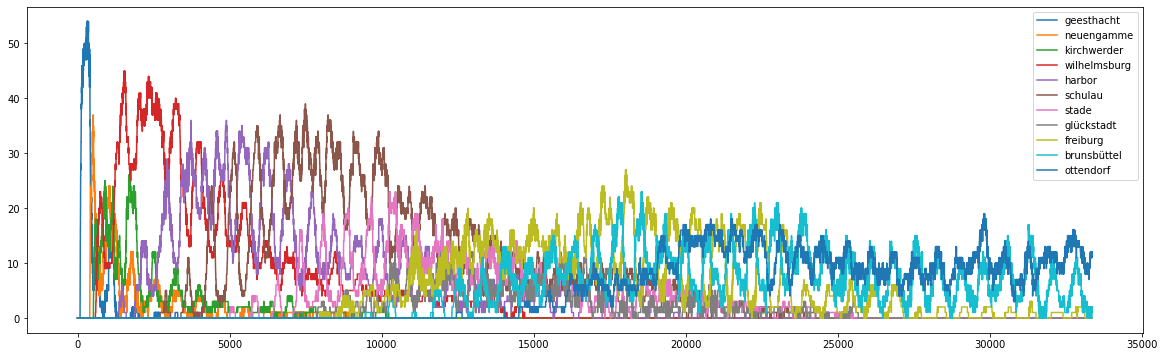

In [2]:
%matplotlib inline
file = '/scratch/local1/output/experiment1_v8/experiment1_stats_polygon_age_00.nc'


polygons = ["geesthacht",
            "neuengamme",
            "kirchwerder",
            "wilhelmsburg",
            "harbor",
            "schulau",
            "stade",
            "glückstadt",
            "freiburg",
            "brunsbüttel",
            "ottendorf",
            "cuxhafen",
            "north_sea"]
            
plt.figure(figsize=(20,6))
stats = cdf.Dataset(file)

for ii in np.arange(1,12):
    plt.plot(stats.variables['count'][:,0,ii],label=polygons[ii-1])
plt.legend()
#plt.xlim(0,400)
#plt.ylim(0,150)
stats.close()

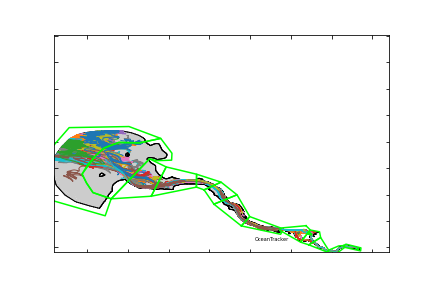

In [25]:
%matplotlib widget
otPlot.plot_tracks('/scratch/local1/output/experiment1_v8/experiment1_tracks.nc')

## 1.10

In [2]:
ncase = 0
path_runInfo = '/scratch/local1/output/plotting_test_v10/experiment1_runInfo.json'
runInfo = loadOutputFiles.load_runInfo(path_runInfo)

In [46]:
import seaborn as sns
sns.set_context('talk')

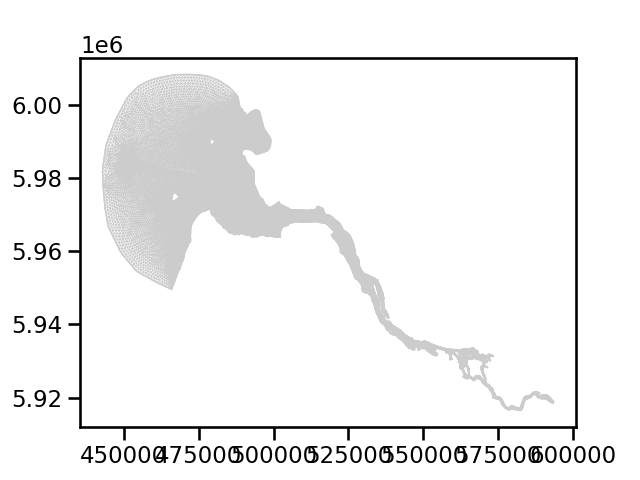

In [4]:
runCaseInfo = loadOutputFiles.load_runCaseInfo(path_runInfo)
grid = loadOutputFiles.load_grid(runCaseInfo)
otPlot.draw_grid(grid)

In [164]:
def plot_particle_statistics_moving_count(path_runInfo,ncase=0,polygons=None):
    # Moving Stranded Boundary

    runInfo = loadOutputFiles.load_runInfo(path_runInfo)
    msb_files = runInfo['caseInfo'][ncase]['output_files']['user_onfly_particle_statistics']
    output_folder = runInfo['caseInfo'][ncase]['output_files']['output_folder']

    polygon_names = []
    for item in runInfo['caseInfo'][ncase]['info']['user_onfly_particle_statistics'][0]['polygon_list']:
        polygon_names.append(item['__comment'])
    
    msb_count = []
    for ii,file_ii in enumerate(msb_files):
        file_ii_path = os.path.join(output_folder,file_ii)
        stats = cdf.Dataset(file_ii_path)
        msb_time = stats.variables['time'][:]
        count = stats.variables['count'][:]
        #print(msb_time,count)
        msb_count.append(count)
        stats.close()

    fig,ax = plt.subplots()
    if polygons is None:
        for polygon in np.arange(0,msb_count[0].shape[2],3):
            ax.plot(msb_time.astype('datetime64[s]'),msb_count[0][:,0,polygon],label=polygon_names[polygon])
    else:
        for polygon in polygons:
            ax.plot(msb_time.astype('datetime64[s]'),msb_count[0][:,0,polygon],label=polygon_names[polygon])
    for label in ax.xaxis.get_ticklabels():
            label.set_rotation(45)
    plt.legend()
    plt.ylabel('particle count')
    plt.tight_layout()
    plt.show()
        

   
    


In [151]:
def plot_particle_statistics_msb(path_runInfo,ncase=0):
    # Moving Stranded Boundary

    runInfo = loadOutputFiles.load_runInfo(path_runInfo)
    msb_files = runInfo['caseInfo'][ncase]['output_files']['user_onfly_particle_statistics']
    output_folder = runInfo['caseInfo'][ncase]['output_files']['output_folder']

    polygon_names = []
    for item in runInfo['caseInfo'][ncase]['info']['user_onfly_particle_statistics'][0]['polygon_list']:
        polygon_names.append(item['__comment'])
    
    msb_count = []
    for ii,file_ii in enumerate(msb_files):
        file_ii_path = os.path.join(output_folder,file_ii)
        stats = cdf.Dataset(file_ii_path)
        msb_time = stats.variables['time'][:]
        count = stats.variables['count'][:]
        #print(msb_time,count)
        msb_count.append(count)
        stats.close()


    fig,ax = plt.subplots()
    plt.stackplot(msb_time.astype('datetime64[s]'),
                  np.sum(msb_count[0][:,0,:],axis=1),
                  np.sum(msb_count[1][:,0,:],axis=1),
                  np.sum(msb_count[2][:,0,:],axis=1)-np.min(np.sum(msb_count[2][:,0,:],axis=1)),
                  labels=['moving','stranded by tide','stranded on bottom'])

    for label in ax.xaxis.get_ticklabels():
            label.set_rotation(45)
    plt.legend(loc='lower right')
    plt.ylabel('particle count')
    plt.tight_layout()
    plt.show()

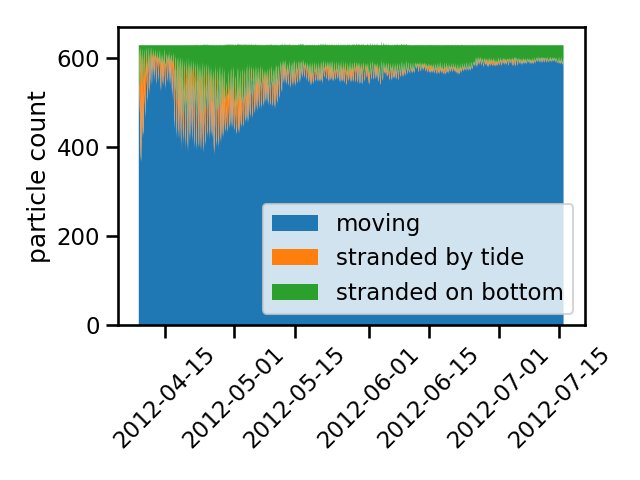

In [153]:
path = '/scratch/local1/output/plotting_test_v10/experiment1_runInfo.json'
plot_particle_statistics_msb(path)

## 21.10 run01

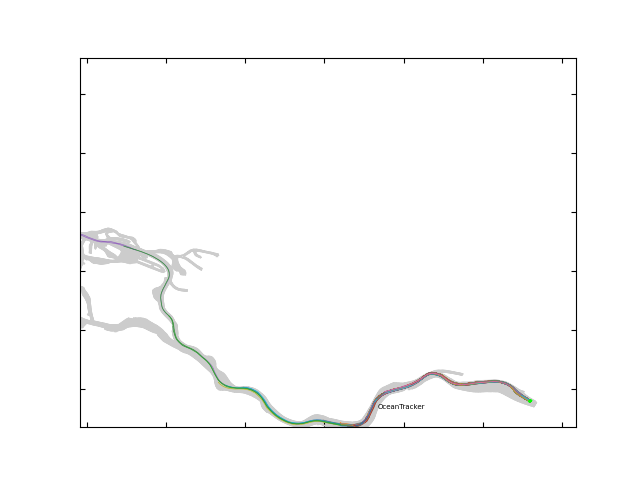

In [31]:
ncase = 0
path_runInfo = '/scratch/local1/output/21_10_01_spawning_area_test_v00/spawning_area_test_runInfo.json'
runCaseInfo = loadOutputFiles.load_runCaseInfo(path_runInfo)
otPlot.plot_tracks(runCaseInfo)

In [ ]:
otPlot.animate_particles(runCaseInfo)

In [15]:
runCaseInfo = loadOutputFiles.load_runCaseInfo(path_runInfo)
grid = loadOutputFiles.load_grid(runCaseInfo)
otPlot.draw_grid(grid)

## 21.10 02 accuracy test

In [33]:

runInfo_path = '/scratch/local1/output/21_10_02_time_step_size_test_v01/21_10_02_time_step_size_test_v01_runInfo.json'

In [34]:
runInfo = loadOutputFiles.load_runInfo(runInfo_path)
#msb_count = np.zeros((40,14100, 14, 13))
msb_count = []
msb_time = []
for ncase in np.arange(len(runInfo['caseInfo'])):
    msb_files = runInfo['caseInfo'][ncase]['output_files']['user_onfly_particle_statistics']
    output_folder = runInfo['caseInfo'][ncase]['output_files']['output_folder']

    file_ii_path = os.path.join(output_folder,msb_files[0]) #moving
    stats = cdf.Dataset(file_ii_path)
    time = stats.variables['time'][:]
    count = stats.variables['count'][:]
    
    msb_time.append(time)
    msb_count.append(count)
    #msb_count[ncase] = count
    stats.close()

In [35]:
df = {'6':   {'count':np.array(msb_count[ 0: 10]),'time':np.array(msb_time[ 0])},
      '12':  {'count':np.array(msb_count[10: 20]),'time':np.array(msb_time[10])},
      '24':  {'count':np.array(msb_count[20: 30]),'time':np.array(msb_time[20])},
      '45':  {'count':np.array(msb_count[30: 40]),'time':np.array(msb_time[30])},
      '90':  {'count':np.array(msb_count[40: 50]),'time':np.array(msb_time[40])},
      '180': {'count':np.array(msb_count[50: 60]),'time':np.array(msb_time[50])},
      '360': {'count':np.array(msb_count[60: 70]),'time':np.array(msb_time[60])},
      '720': {'count':np.array(msb_count[70: 80]),'time':np.array(msb_time[70])},
      '1800':{'count':np.array(msb_count[80: 90]),'time':np.array(msb_time[80])},
      '3600':{'count':np.array(msb_count[90:100]),'time':np.array(msb_time[90])}}

polygon_names = []
for item in runInfo['caseInfo'][ncase]['info']['user_onfly_particle_statistics'][0]['polygon_list']:
    polygon_names.append(item['__comment'])

In [58]:
df[key]['time'].shape

In [59]:
%matplotlib widget
for polygon in [4]:
    for key in df:
        plt.plot(df[key]['time'],df[key]['count'][0,:,0,polygon],label=key)
plt.legend()

In [48]:
for polygon in [1,4]:
    for key in df:
        idx_max = np.argmax(df[key]['count'][:,:,0,polygon],axis=1)
        df[key]['count_max'] = df[key]['count'][0,idx_max,0,polygon]
        df[key]['count_std'] = np.std(df[key]['count_max'])
        df[key]['time_max'] = df[key]['time'][idx_max]
        df[key]['time_std'] = np.std(df[key]['time_max'])

    fig,ax = plt.subplots(figsize=(10,5))
    plt.title(polygon_names[polygon])

    w = 0.1
    width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)

    positions = (3600/np.array([int(key) for key in df]))

    #ax.boxplot(a, positions=positions, widths=width(positions,w))
    out = plt.boxplot([df[key]['count_max'] for  key in df],
                      positions = positions,
                      widths = width(positions,w),
                      labels = (3600/np.array([int(key) for key in df])))
    plt.ylabel(f'particle count in polygon {polygon} at maximum')
    plt.xlabel('time step [s]')
    ax.set_xscale("log")
    #plt.xlim(4,700)
    plt.tight_layout()

In [49]:
%matplotlib widget
for polygon in [1,4]:
    for key in df:
        idx_max = np.argmax(df[key]['count'][:,:,0,polygon],axis=1)
        df[key]['count_max'] = df[key]['count'][0,idx_max,0,polygon]
        df[key]['count_std'] = np.std(df[key]['count_max'])
        df[key]['time_max'] = df[key]['time'][idx_max]
        df[key]['time_std'] = np.std(df[key]['time_max'])

    fig,ax = plt.subplots(figsize=(10,5))
    plt.title(polygon_names[polygon])

    w = 0.1
    width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)

    positions = (3600/np.array([int(key) for key in df]))
    y = [df[key]['time_max'] for  key in df]
    #y = (y - np.min(y))/3600
    #ax.boxplot(a, positions=positions, widths=width(positions,w))
    out = plt.boxplot(y,
                      positions = positions,
                      widths = width(positions,w),
                      labels = (3600/np.array([int(key) for key in df])))
    plt.ylabel(f'time since epoch [s] in polygon {polygon} at maximum')
    plt.xlabel('time step [s]')
    ax.set_xscale("log")
    plt.tight_layout()

## 21.10 03 depth test

In [3]:
tracks = cdf.Dataset('/scratch/local1/output/21_10_03_depth_accuracy_test_v00/21_10_03_depth_accuracy_test_v00_C09R00_tracks.nc')

In [47]:
dat = cdf.Dataset('/scratch/local1/hzg/schout_100.nc')

In [52]:
dat.variables['depth']

<class 'netCDF4._netCDF4.Variable'>
float32 depth(nSCHISM_hgrid_node)
    long_name: Bathymetry
    units: meters
    positive: down
    mesh: SCHISM_hgrid
    location: node
unlimited dimensions: 
current shape = (32432,)
filling on, default _FillValue of 9.969209968386869e+36 used

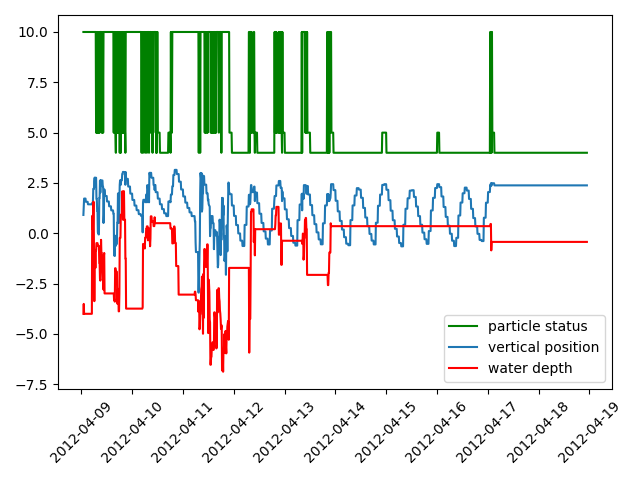

In [73]:
%matplotlib widget
runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_03_depth_accuracy_test_v00/21_10_03_depth_accuracy_test_v00_runInfo.json')
tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth'])

ii = 5
fig,ax0 = plt.subplots()
ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

#plt.ylim(-8,10)
plt.legend()
plt.tight_layout()

In [ ]:

            ax.plot(msb_time.astype('datetime64[s]'),msb_count[0][:,0,polygon],label=polygon_names[polygon])
    for label in ax.xaxis.get_ticklabels():
            label.set_rotation(45)

In [7]:
runInfo = loadOutputFiles.load_runInfo(runInfo_path)
for ncase in np.arange(len(runInfo['caseInfo'])):
    msb_files = runInfo['caseInfo'][ncase]['output_files']['user_onfly_particle_statistics']
    output_folder = runInfo['caseInfo'][ncase]['output_files']['output_folder']

    file_ii_path = os.path.join(output_folder,msb_files[0]) #moving
    stats = cdf.Dataset(file_ii_path)
    time = stats.variables['time'][:]
    count = stats.variables['count'][:]
    
    msb_time.append(time)
    msb_count.append(count)
    #msb_count[ncase] = count
    stats.close()

In [8]:
def construct_df(keys,count_data,time_data,replicates):
    for ii,key in enumerate(keys):
        df = {key: {'count':np.array(cound_data[replicates*ii:replicates*(ii+1)]),
                    'time' :np.array(time_data[replicates*ii])}}
    return df


In [10]:
runInfo

NameError: name 'runInfo' is not defined

In [ ]:
df = constructor_df(keys)

In [35]:
df = {'6':   {'count':np.array(msb_count[ 0: 10]),'time':np.array(msb_time[ 0])},
      '12':  {'count':np.array(msb_count[10: 20]),'time':np.array(msb_time[10])},
      '24':  {'count':np.array(msb_count[20: 30]),'time':np.array(msb_time[20])},
      '45':  {'count':np.array(msb_count[30: 40]),'time':np.array(msb_time[30])},
      '90':  {'count':np.array(msb_count[40: 50]),'time':np.array(msb_time[40])},
      '180': {'count':np.array(msb_count[50: 60]),'time':np.array(msb_time[50])},
      '360': {'count':np.array(msb_count[60: 70]),'time':np.array(msb_time[60])},
      '720': {'count':np.array(msb_count[70: 80]),'time':np.array(msb_time[70])},
      '1800':{'count':np.array(msb_count[80: 90]),'time':np.array(msb_time[80])},
      '3600':{'count':np.array(msb_count[90:100]),'time':np.array(msb_time[90])}}

polygon_names = []
for item in runInfo['caseInfo'][ncase]['info']['user_onfly_particle_statistics'][0]['polygon_list']:
    polygon_names.append(item['__comment'])

## 21.10 **04** **spawing retention**

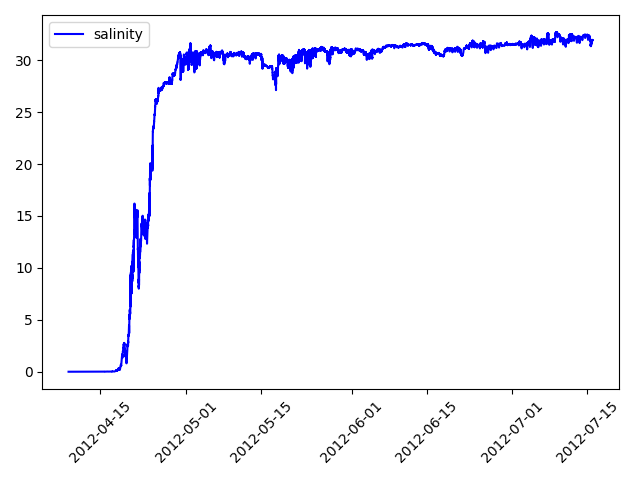

In [3]:
%matplotlib widget
runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_04_spawning_retention_v00/21_10_04_spawning_retention_v00_runInfo.json')
tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth','salinity'])

ii = 5
fig,ax0 = plt.subplots()
#ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
#ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
#ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')
ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['salinity'][:,ii],c='blue',label='salinity')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

#plt.ylim(-8,10)
plt.legend()
plt.tight_layout()

## 21.10 **5** *spawning retention*

In [2]:

runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_05_spawning_retention_v01/21_10_05_spawning_retention_v01_runInfo.json')
tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth','salinity'])

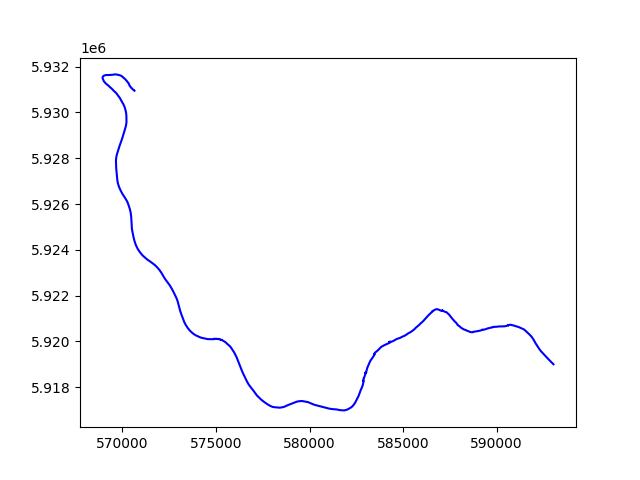

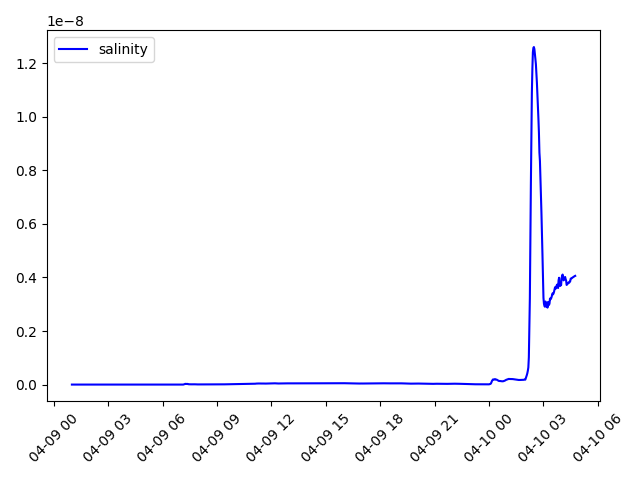

In [16]:
%matplotlib widget

ii = 4
jj = 1000

plt.plot(tracks['x'][:jj,ii,0],tracks['x'][:jj,ii,1],c='blue',label='salinity')

fig,ax0 = plt.subplots()
#ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
#ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
#ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')
ax0.plot(tracks['time'][:jj].astype('datetime64[s]'),tracks['salinity'][:jj,ii],c='blue',label='salinity')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

#plt.ylim(-8,10)
plt.legend()
plt.tight_layout()

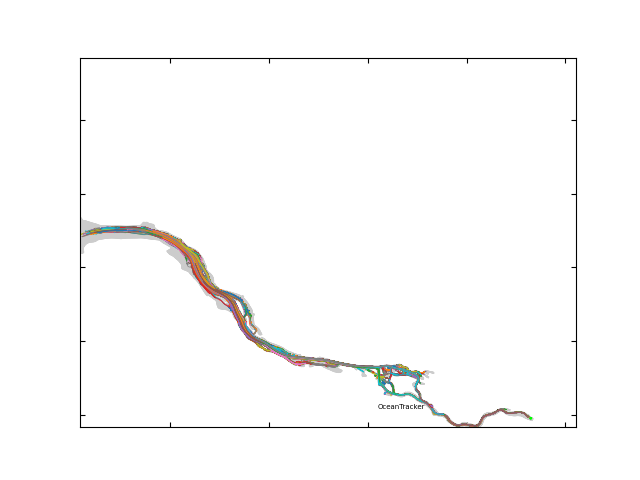

In [4]:
otPlot.plot_tracks(runCaseInfo)

## 21.10 **6** *spawning retention*

In [34]:
runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_06_spawning_retention_v02/21_10_06_spawning_retention_v01_runInfo.json')

In [31]:
tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth','salinity'])


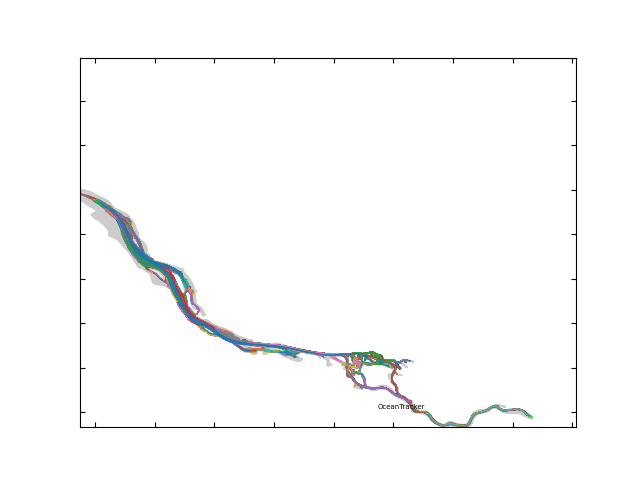

In [57]:
otPlot.plot_tracks(runCaseInfo)

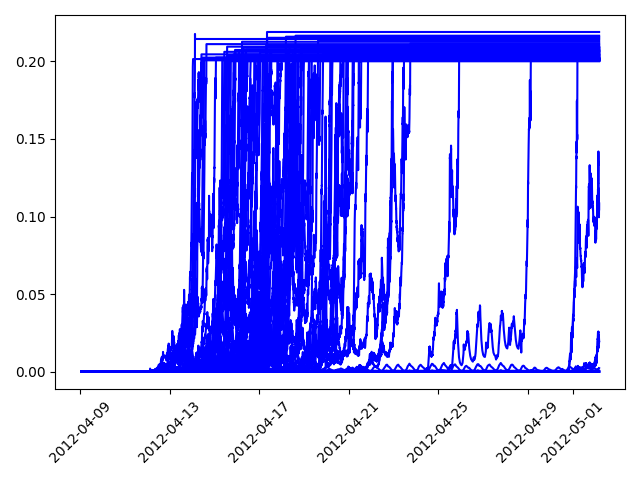

In [42]:
%matplotlib widget

ii = 4
jj = 20000

#plt.plot(tracks['x'][:jj,ii,0],tracks['x'][:jj,ii,1],c='blue',label='salinity')

fig,ax0 = plt.subplots()
#ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
#ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
#ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')
for ii in np.arange(0,100):
        ax0.plot(tracks['time'][:jj].astype('datetime64[s]'),tracks['salinity'][:jj,ii],c='blue',label='salinity')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

#plt.ylim(-8,10)
#plt.legend()
plt.tight_layout()

In [56]:
np.where(tracks['salinity'][-1] < 0)

(array([ 593, 1135, 1434, 1657, 1808, 1927, 2047, 2146]),)

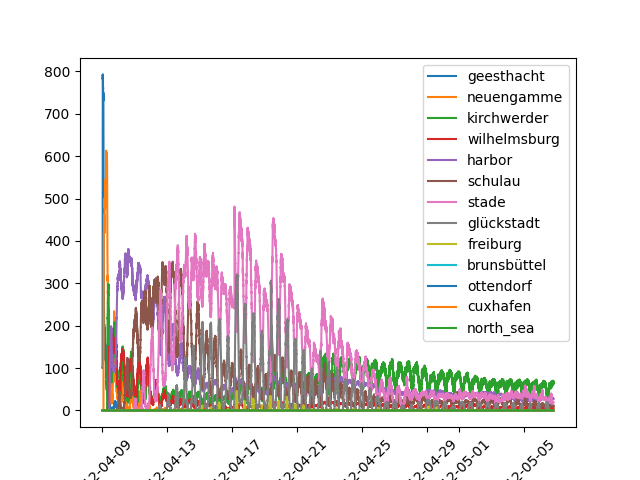

In [35]:

stats = loadOutputFiles.load_stats_file(runCaseInfo)
stats['count']

polygon_names = []
for item in stats['info']['polygon_list']:
    polygon_names.append(item['__comment'])

fig,ax = plt.subplots()
for ii in np.arange(stats['count'].shape[2]):
    plt.plot(stats['time'].astype('datetime64[s]'),stats['count'][:,0,ii],label=polygon_names[ii])
plt.legend()

for label in ax.xaxis.get_ticklabels():
        label.set_rotation(45)

## 21.10 **7** *spawning retention*

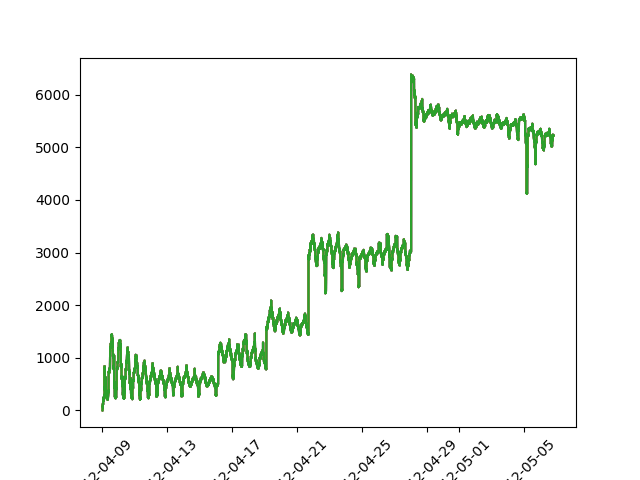

In [66]:
%matplotlib widget
runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_06_spawning_retention_v03/21_10_07_spawning_retention_v03_runInfo.json')
stats = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=2)
stats['count']

polygon_names = []
for item in stats['info']['polygon_list']:
    polygon_names.append(item['__comment'])

fig,ax = plt.subplots()
for ii in np.arange(stats['count'].shape[2]):
    plt.plot(stats['time'].astype('datetime64[s]'),np.sum(stats['count'][:,0,:],axis=1))

for label in ax.xaxis.get_ticklabels():
        label.set_rotation(45)

In [60]:
%matplotlib widget
runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_06_spawning_retention_v03/21_10_07_spawning_retention_v03_runInfo.json')
stats = loadOutputFiles.load_stats_file(runCaseInfo)
stats['count']

polygon_names = []
for item in stats['info']['polygon_list']:
    polygon_names.append(item['__comment'])

fig,ax = plt.subplots()
plt.plot(stats['time'].astype('datetime64[s]'),stats['count'][:,0,ii],label=polygon_names[ii])

for label in ax.xaxis.get_ticklabels():
        label.set_rotation(45)

## pulled new master - be aware of version conflicts

## 21.10 8 spawning retention

In [11]:
def load_msb_stats(runCaseInfo):
    m = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=0)
    s = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=1)
    b = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=2)

    polygon_names = []
    for item in m['info']['polygon_list']:
        polygon_names.append(item['__comment'])
    
    df = {'time': m['time'],
          'm': m['count'],
          's': s['count'],
          'b': b['count'],
          'polygon_names': polygon_names}
    
    return df

In [3]:
def plot_m_polycount(df,poly_range=(0,12)):

    fig,ax = plt.subplots()
    for ii in np.arange(poly_range[0],poly_range[1]):
        plt.plot(df['time'].astype('datetime64[s]'),df['m'][:,0,ii],label=df['polygon_names'][ii])
    #plt.plot(stats['time'].astype('datetime64[s]'),np.sum(stats['count'][:,0,:],axis=1),label=polygon_names[ii])

    for label in ax.xaxis.get_ticklabels():
            label.set_rotation(45)

    plt.legend()
    plt.ylabel('particle count in stat. polygon')

    plt.show()


In [40]:
def plot_total_polycount(df,poly_range=(0,12)):

    total = df['m'] + df['s'] + df['b']
    fig,ax = plt.subplots()
    for ii in np.arange(poly_range[0],poly_range[1]):
        plt.plot(df['time'].astype('datetime64[s]'),total[:,0,ii],label=df['polygon_names'][ii])
    plt.plot(df['time'].astype('datetime64[s]'),np.sum(total[:,0,:],axis=1),label='total')

    for label in ax.xaxis.get_ticklabels():
            label.set_rotation(45)

    plt.legend()
    plt.ylabel('particle count in stat. polygon')

    plt.show()


In [22]:
import seaborn as sns
sns.set_context('notebook')
#sns.set_cmap(sns.color_palette("viridis", as_cmap=True))
sns.set_palette("hls",12)

In [7]:

runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_08_spawning_retention_v04/21_10_08_spawning_retention_v04_runInfo.json')
stats = loadOutputFiles.load_stats_file(runCaseInfo)
df = load_msb_stats(runCaseInfo)

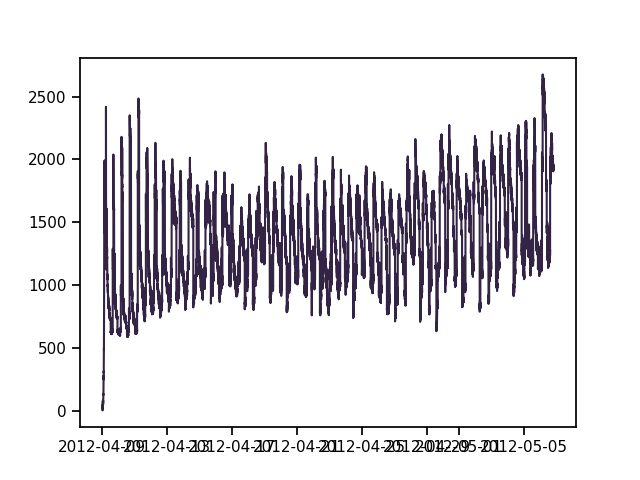

In [15]:
plt.figure()
plt.plot(df['time'][:].astype('datetime64[s]'),(np.sum(df['b'][:,0,:],axis=1)),label='total')
plt.show()

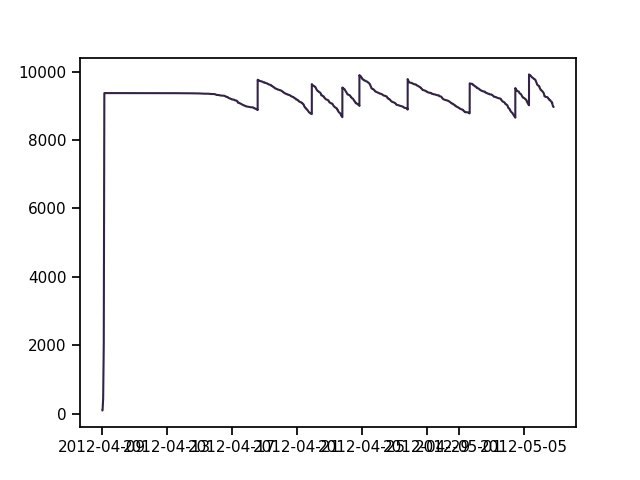

In [9]:
plt.figure()
total = df['m'] + df['s'] + df['b']
plt.plot(df['time'][:].astype('datetime64[s]'),(np.sum(total[:,0,:],axis=1)),label='total')
plt.show()

In [ ]:
plot_total_polycount(df,(0,5))

## 21.10 9 depth accuaracy

In [68]:
runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_09_depth_accuracy_test_v01/21_10_09_depth_accuracy_test_v01_runInfo.json',ncase=10)
tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth'])

In [75]:
schout = cdf.Dataset('/scratch/local1/hzg/schout_100.nc')

In [104]:
!pwd

/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker02/experiments


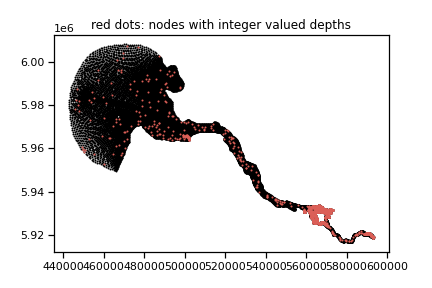

In [105]:
schout = cdf.Dataset('/scratch/local1/hzg/schout_100.nc')

plt.figure()
sliced = [schout.variables['depth'][:] == schout.variables['depth'][:].astype('int32')]
x = schout.variables['SCHISM_hgrid_node_x']
y = schout.variables['SCHISM_hgrid_node_y']
plt.scatter(x[:],y[:],c='black',s=1)
plt.scatter(x[sliced],y[sliced],s=1)
plt.title('red dots: nodes with integer valued depths')
plt.show()

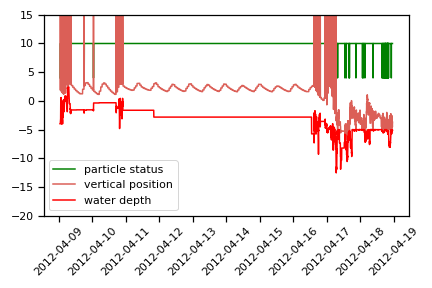

In [74]:
%matplotlib widget

ii = 1
fig,ax0 = plt.subplots()
ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

plt.ylim(-20,15)
plt.legend()
plt.tight_layout()

## 21.10 10 spawning retention

In [6]:

runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_runInfo.json')
stats = loadOutputFiles.load_stats_file(runCaseInfo)
df = load_msb_stats(runCaseInfo)

/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C00R00_caseInfo.json


In [14]:
runCaseInfo['output_files']

12

In [25]:
sns.color_palette('hls',12)[0]

(0.86, 0.3712, 0.33999999999999997)

/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C00R00_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C00R01_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C00R02_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C01R00_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C01R01_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C01R02_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C02R00_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C02R01_caseInfo.json
/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_C02R02_caseInfo.json
/scratch/local1/output/21_10

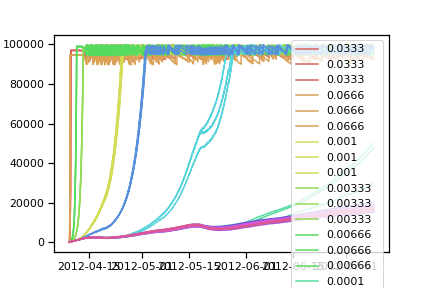

In [26]:
%matplotlib widget
plt.figure()

for ii,item in enumerate(runCaseInfo['output_files']['caseInfo']):
    #print(ii,item)
    CaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_10_spawning_retention_v05/21_10_10_spawning_retention_v05_runInfo.json',ncase=ii)
    df = load_msb_stats(CaseInfo)
    rate = CaseInfo['user_params']['case_list'][int(ii/runCaseInfo['replicates'])]['user_class_lists']['user_trajectory_modifiers'][1]['fraction_to_split']
    #print(rate)
    total = df['m'] + df['s'] + df['b']
    plt.plot(df['time'][:].astype('datetime64[s]'),(np.sum(total[:,0,:],axis=1)),label=rate,c=sns.color_palette('hls',12)[int(ii/runCaseInfo['replicates'])])
plt.legend()
plt.show()

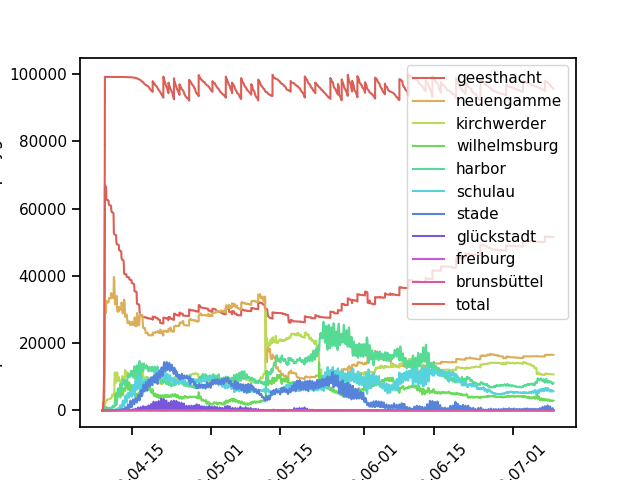

In [27]:
plot_total_polycount(df,(0,10))

## 21.10 11 depth accuracy test v02

In [34]:
ncase = 0

runCaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_11_depth_accuracy_test_v02/21_10_11_depth_accuracy_test_v02_runInfo.json',ncase=ncase)
tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth'])

fig,ax0 = plt.subplots()
for ii in np.arange(tracks['status'][:,:].shape[1]):
    #ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
    ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
#ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

plt.ylim(-20,15)
#plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'run_output_dir'

## merged new commit - broke some pathing (i think)

## 21.10 12 vertical_velocity_test v00

In [4]:

ncase = 8
path = "/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_runInfo.json"
runCaseInfo = loadOutputFiles.load_runCaseInfo(path,ncase=ncase)
#tracks = loadOutputFiles.load_particle_track_vars(runCaseInfo, ['x', 'status', 'time','water_depth'])

/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C08R00_caseInfo.json


In [1]:

fig,ax0 = plt.subplots()
for ii in np.arange(tracks['status'][:,:].shape[1]):
    #ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['status'][:,ii],c='green',label='particle status',zorder=0)
    ax0.plot(tracks['time'].astype('datetime64[s]'),tracks['x'][:,ii,2],label='vertical position',zorder=1)
#ax0.plot(tracks['time'].astype('datetime64[s]'),-tracks['water_depth'][:,ii],c='red',label='water depth')


for label in ax0.xaxis.get_ticklabels():
        label.set_rotation(45)

plt.ylim(-20,15)
#plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [9]:

stats = loadOutputFiles.load_stats_file(runCaseInfo)
df = load_msb_stats(runCaseInfo)

In [ ]:
plt.figure()
plt.plot(df['time'][:].astype('datetime64[s]'),(np.sum(df['b'][:,0,:],axis=1)),label='total')
plt.show()

0 21_10_12_vertical_velocity_test_v00_C00R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C00R00_caseInfo.json
-0.01


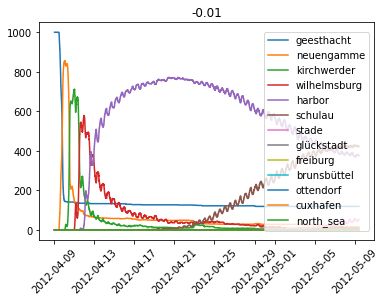

1 21_10_12_vertical_velocity_test_v00_C01R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C01R00_caseInfo.json
-0.0075


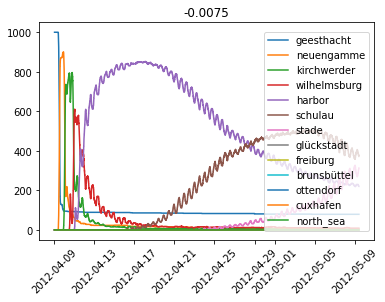

2 21_10_12_vertical_velocity_test_v00_C02R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C02R00_caseInfo.json
-0.005


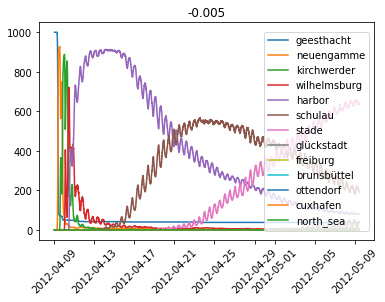

3 21_10_12_vertical_velocity_test_v00_C03R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C03R00_caseInfo.json
-0.0025


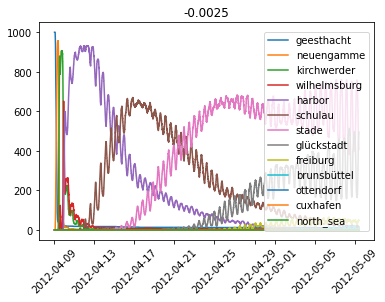

4 21_10_12_vertical_velocity_test_v00_C04R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C04R00_caseInfo.json
0


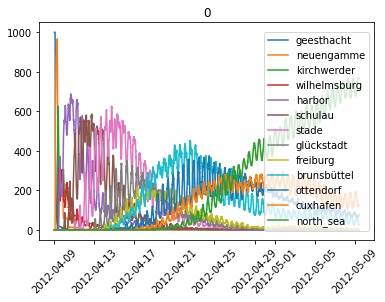

5 21_10_12_vertical_velocity_test_v00_C05R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C05R00_caseInfo.json
0.0025


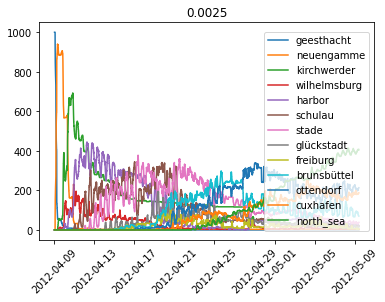

6 21_10_12_vertical_velocity_test_v00_C06R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C06R00_caseInfo.json
-0.005


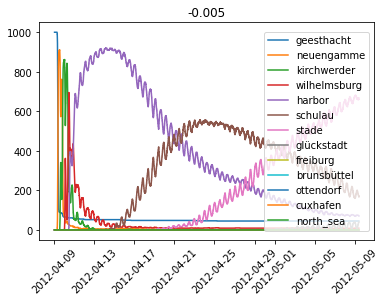

7 21_10_12_vertical_velocity_test_v00_C07R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C07R00_caseInfo.json
0.0075


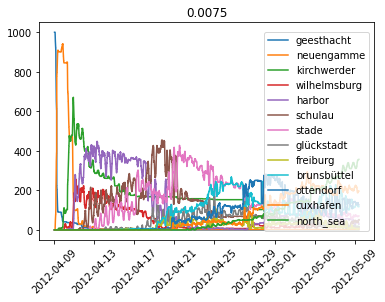

8 21_10_12_vertical_velocity_test_v00_C08R00_caseInfo.json
/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_C08R00_caseInfo.json
100.0


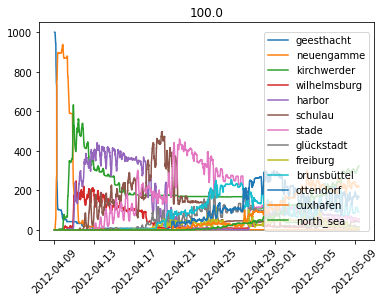

In [33]:
%matplotlib inline

for ii,item in enumerate(runCaseInfo['output_files']['caseInfo']):
    print(ii,item)
    CaseInfo = loadOutputFiles.load_runCaseInfo('/scratch/local1/output/21_10_12_vertical_velocity_test_v00/21_10_12_vertical_velocity_test_v00_runInfo.json',ncase=ii)
    df = load_msb_stats(CaseInfo)
    rate = CaseInfo['user_params']['case_list'][ii]['user_class_lists']['user_velocity_modifiers'][0]['mean']
    print(rate)
    total = df['m'] + df['s'] + df['b']
    
    fig,ax = plt.subplots()
    for jj in np.arange(total.shape[2]):
        plt.plot(df['time'][:].astype('datetime64[s]'),total[:,0,jj],label=df['polygon_names'][jj])
    plt.legend(loc='right')
    plt.title(rate)
    for label in ax.xaxis.get_ticklabels():
        label.set_rotation(45)
    plt.show()

In [ ]:
plot_total_polycount(df,(0,10))

## 21.10 13 SA of sinking/floating & reproduction rates 

In [2]:
def load_multicase_msb_stats(path_runInfo):

    runInfo = loadOutputFiles.load_runInfo(path)
    #print(list(runInfo['caseInfo']))
    multicase_df = {}
    for ii,caseInfo in enumerate(runInfo['caseInfo']):
        run_name = runInfo['output_files']['caseInfo'][ii][-20:-14]
        runCaseInfo = copy.deepcopy(runInfo)
        runCaseInfo['caseInfo'] = caseInfo

        m = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=0)
        s = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=1)
        b = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=2)

        polygon_names = []
        for item in m['info']['polygon_list']:
            polygon_names.append(item['__comment'])
        
        singlecase_df = {'time': m['time'],
            'm': m['count'],
            's': s['count'],
            'b': b['count'],
            'polygon_names': polygon_names,
            'case_properties': runInfo['user_params']['case_list'][ii]}

        multicase_df[run_name] = singlecase_df

    return multicase_df

In [3]:
def plot_sa_total_polycount(df,sa_shape,title='',poly_range=(0,12)):


    cases = [df[item] for item in df]
    fig,ax = plt.subplots(sa_shape[0],sa_shape[1],sharex=True,figsize=(12,6))

    kk = 0

    for kk in range(sa_shape[0]):
        for jj in range(sa_shape[1]):
            df = cases[kk+jj]
            velo = df['case_properties']["user_class_lists"]['user_velocity_modifiers'][0]['mean']
            ratio = df['case_properties']["user_class_lists"]['user_trajectory_modifiers'][1]['fraction_to_split']
            total = df['m'] + df['s'] + df['b']
            for ii in np.arange(poly_range[0],poly_range[1]):
                ax[kk][jj].plot(df['time'].astype('datetime64[s]'),total[:,0,ii],label=df['polygon_names'][ii])
            ax[kk][jj].plot(df['time'].astype('datetime64[s]'),np.sum(total[:,0,:],axis=1),label='total')
            ax[kk][jj].set_title(str(velo)+' '+str(ratio))

    #for label in ax.xaxis.get_ticklabels():
    #        label.set_rotation(45)

    plt.tight_layout()
    plt.show()


In [4]:
path = '/scratch/local1/output/21_10_13_sa_verticle_spawning_v00/21_10_13_sa_verticle_spawning_v00_runInfo.json'

In [5]:
df = load_multicase_msb_stats(path)

KeyError: 'output_folder'

In [45]:
cases = [df[item] for item in df]
[item['case_properties']['user_class_lists'] for item in cases][0]

{'user_velocity_modifiers': [{'class_name': 'oceantracker.particle_velocity.terminal_velocity.AddTerminalVelocity',
   'mean': -0.01}],
 'user_trajectory_modifiers': [{'class_name': 'oceantracker.user_trajectory_modifiers.resuspension.AlwaysResuspend'},
  {'class_name': 'oceantracker.user_trajectory_modifiers.splitParticles.ParticleSplit',
   'splitting_interval': 100,
   'min_status_to_split': 10,
   'fraction_to_split': 0},
  {'class_name': 'oceantracker.user_trajectory_modifiers.cullParticlesConcentration.ParticleCull',
   'cull_interval': 100,
   'status_to_cull': 0,
   'threshold_to_cull': 0.2,
   'fraction_to_cull': 1.0,
   'concentration_field': 'salinity'}]}

In [39]:

cases = [df[item] for item in df]
fig,ax = plt.subplots(sa_shape[0],sa_shape[1],sharex=True,figsize=(12,6))

kk = 0

for kk in range(sa_shape[0]):
    for jj in range(sa_shape[1]):
        df = cases[kk+jj]
        velo = df['case_properties']["user_class_lists"]['user_velocity_modifiers'][0]['mean']
        ratio = df['case_properties']["user_class_lists"]['user_trajectory_modifiers'][1]['fraction_to_split']
        total = df['m'] + df['s'] + df['b']
        for ii in np.arange(poly_range[0],poly_range[1]):
            ax[kk][jj].plot(df['time'].astype('datetime64[s]'),total[:,0,ii],label=df['polygon_names'][ii])
        ax[kk][jj].plot(df['time'].astype('datetime64[s]'),np.sum(total[:,0,:],axis=1),label='total')
        ax[kk][jj].set_title(str(velo)+' '+str(ratio))

#for label in ax.xaxis.get_ticklabels():
#        label.set_rotation(45)

plt.tight_layout()
plt.show()


C00R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C01R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C02R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C03R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C04R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C05R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C06R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C07R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 133...   
m                [[[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],...   
s                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
b                [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[...   
polygon_names    [geesthacht, neuengamme, kirchwerder, wilhelms...   
case_properties  {'user_class_lists': {'user_velocity_modifiers...   

                                                            C08R00  \
time             [1333933200.0, 1333933260.0, 1333933320.0, 13

In [ ]:
frame.sort_index

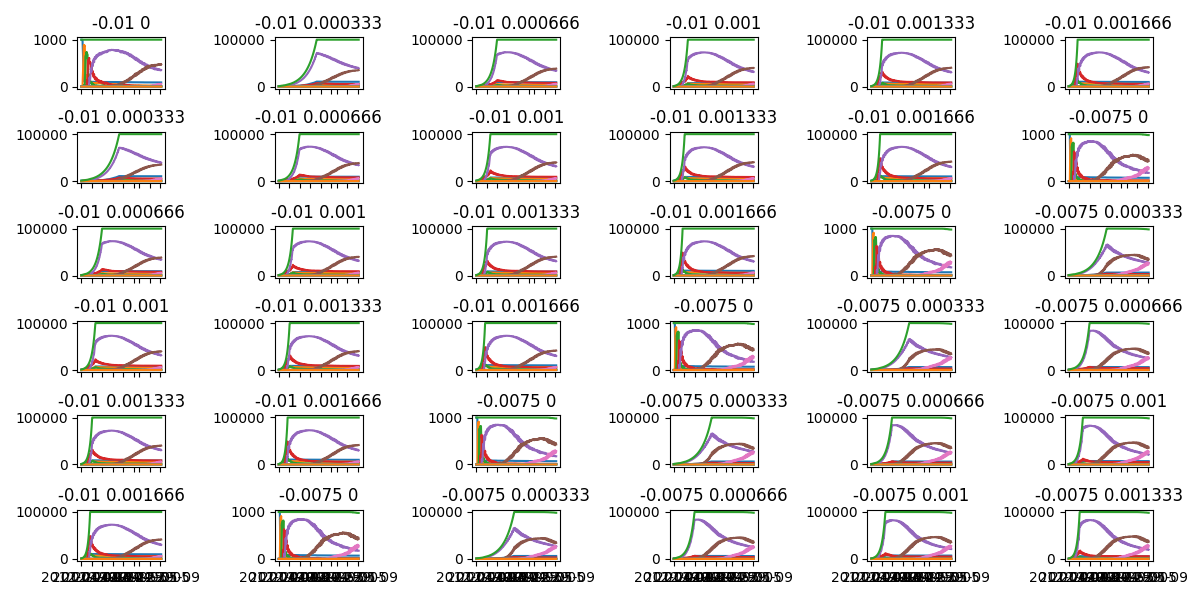

In [32]:
%matplotlib widget
plot_sa_total_polycount(df,(6,6))

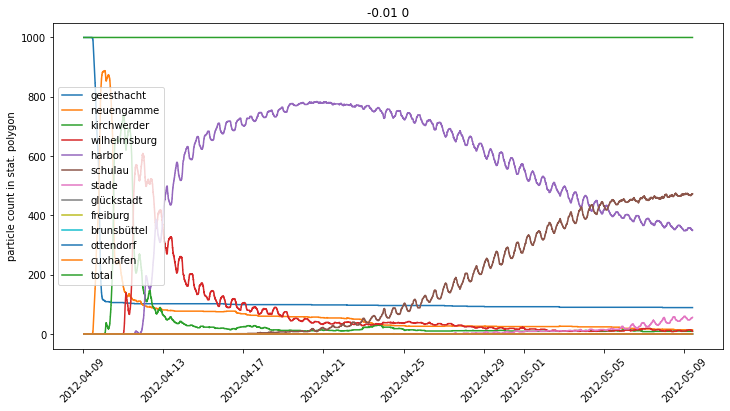

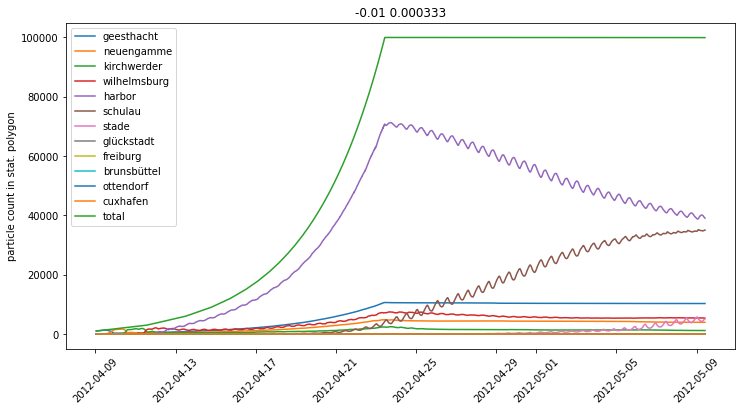

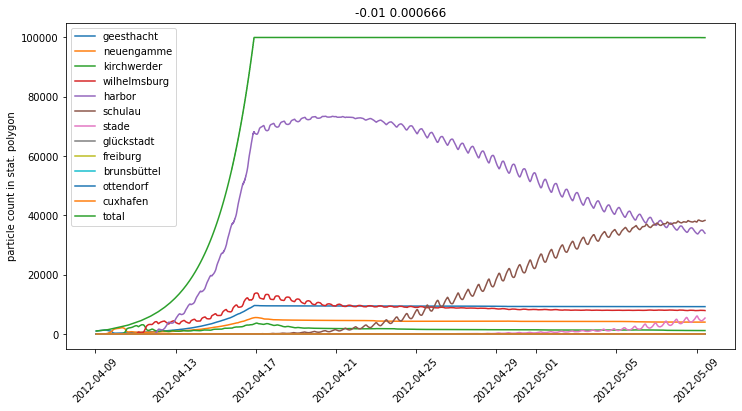

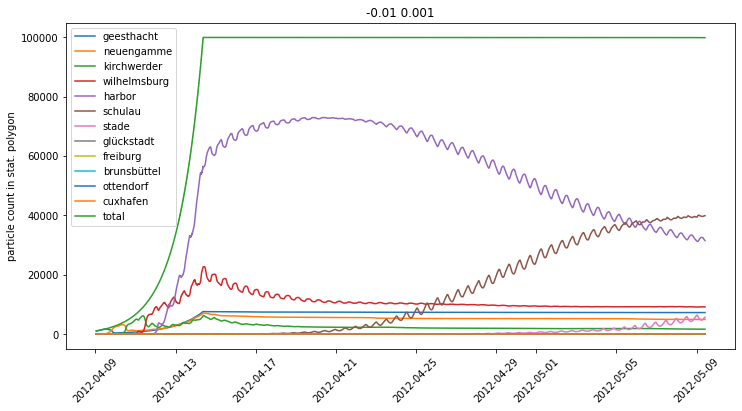

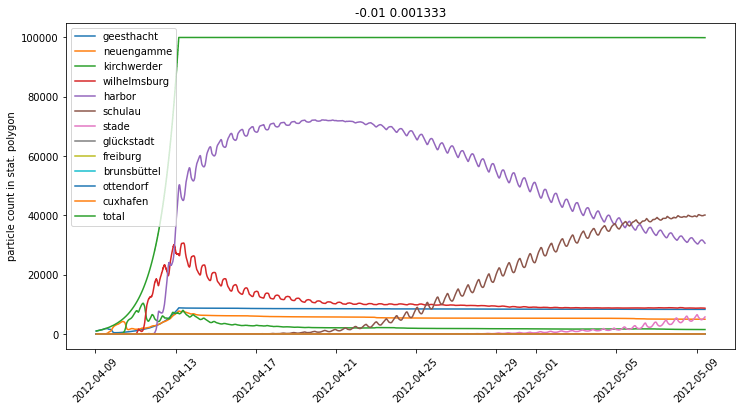

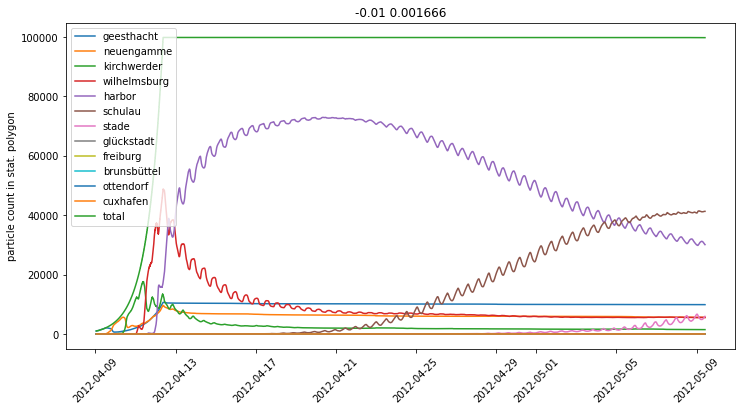

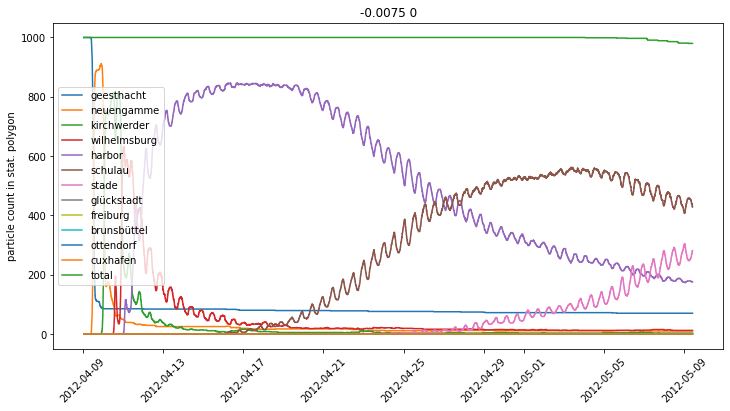

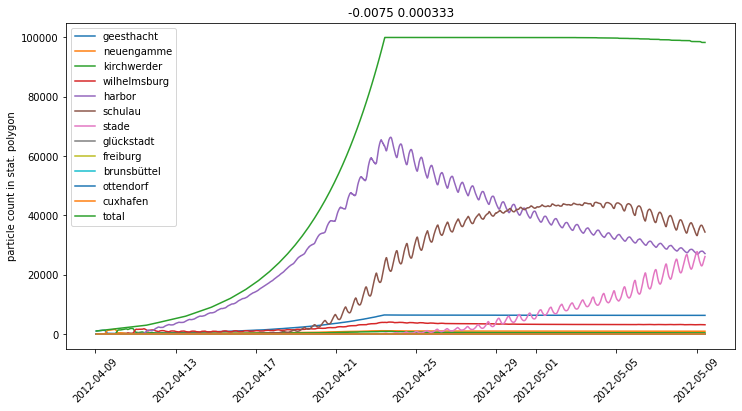

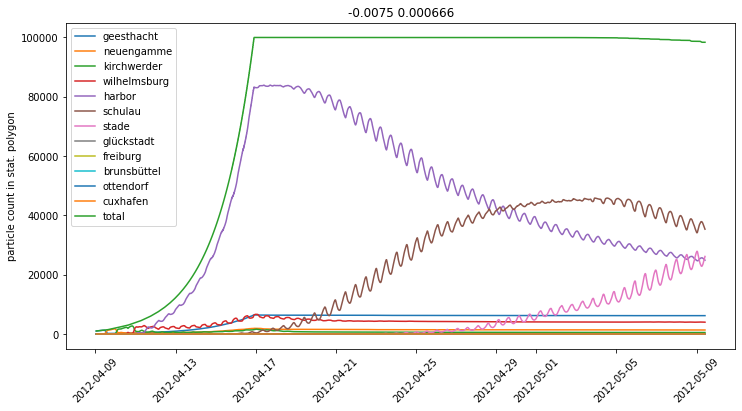

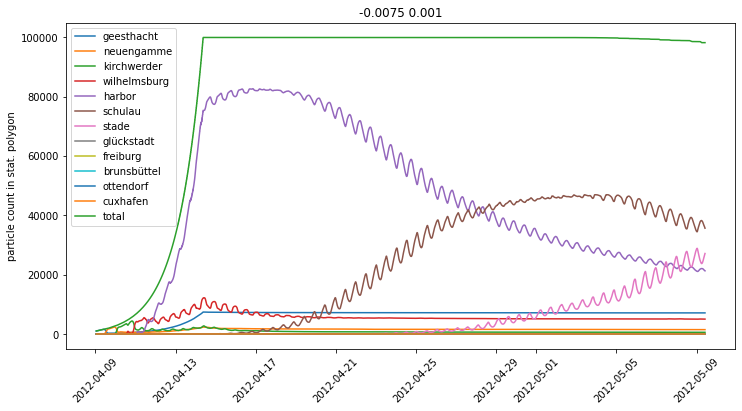

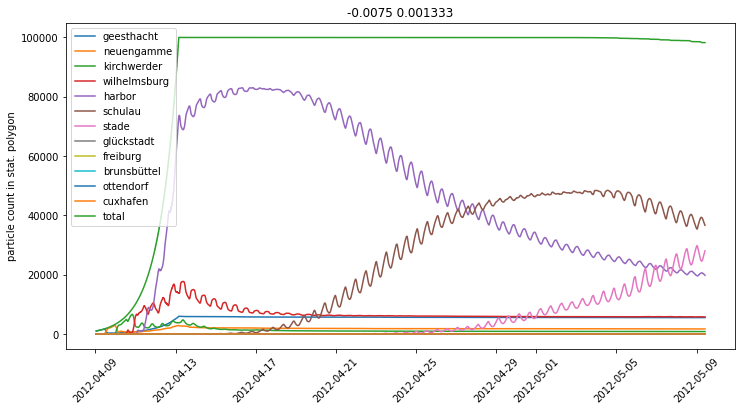

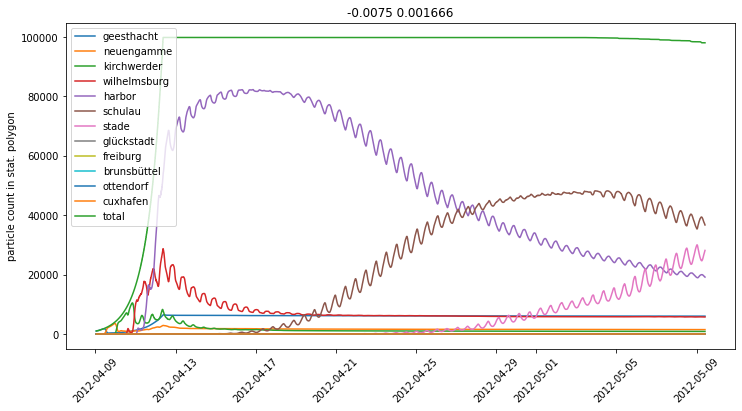

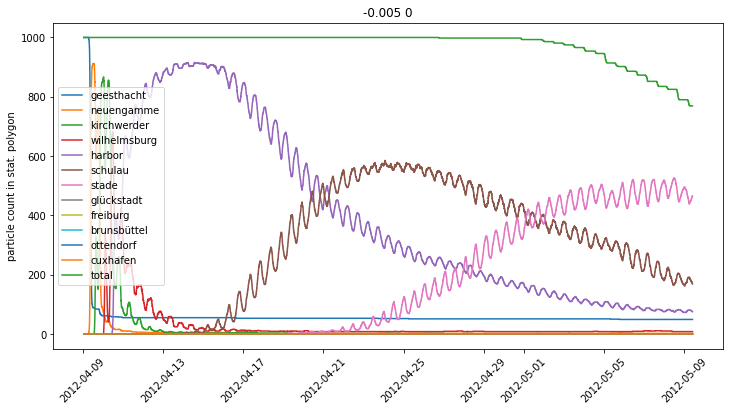

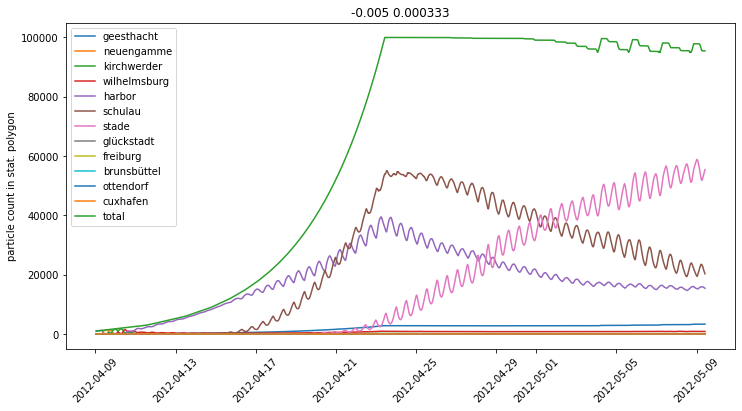

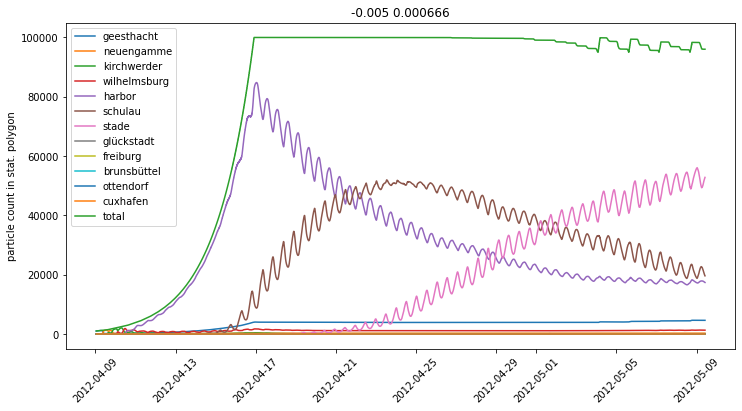

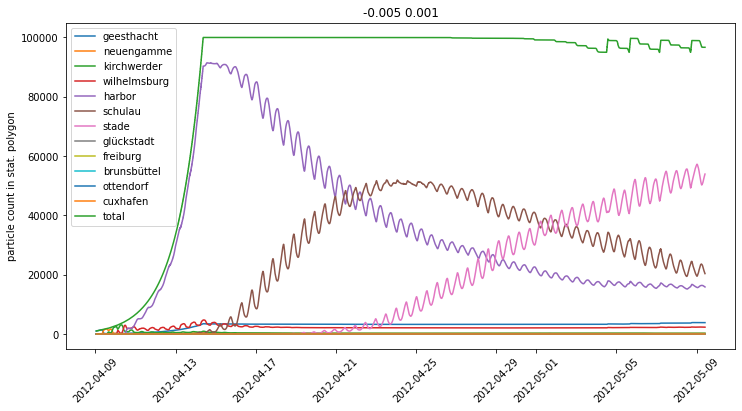

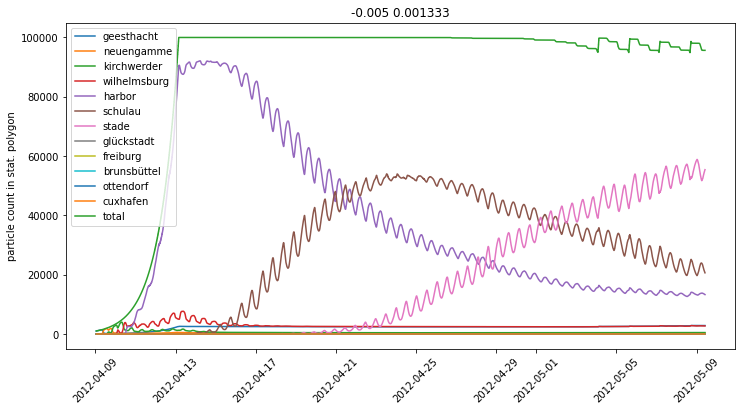

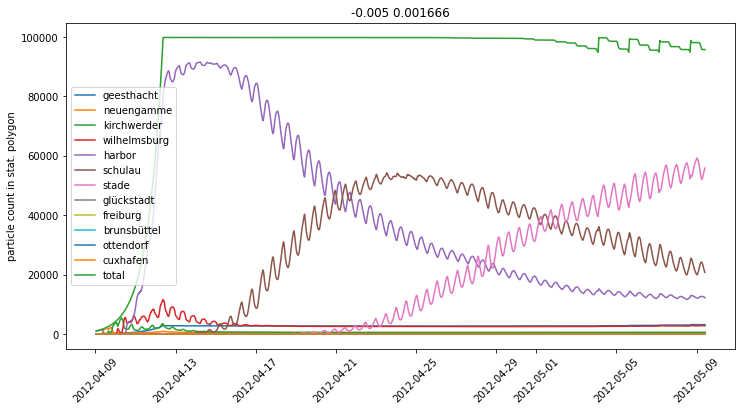

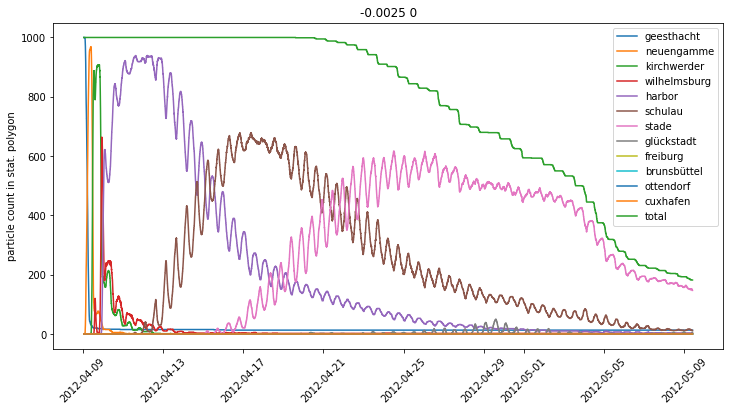

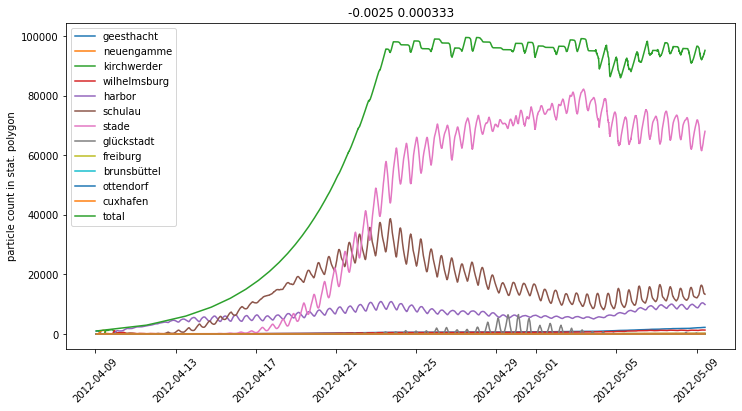

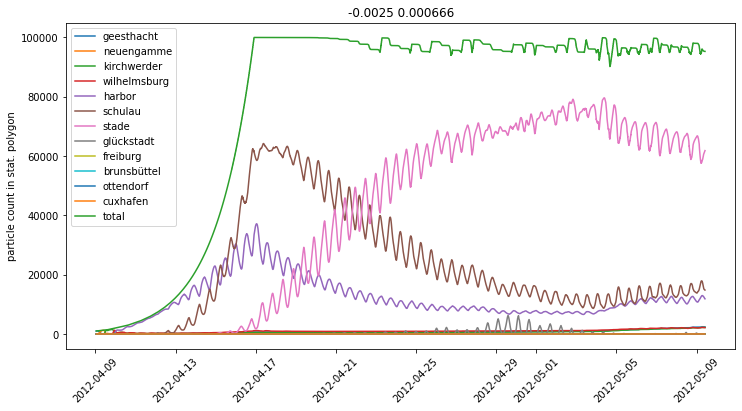

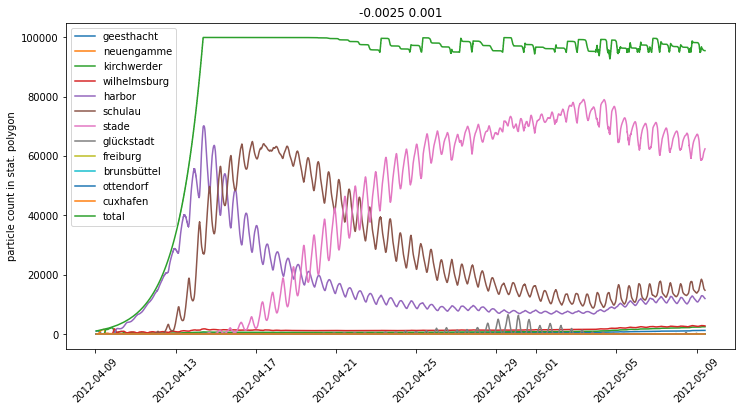

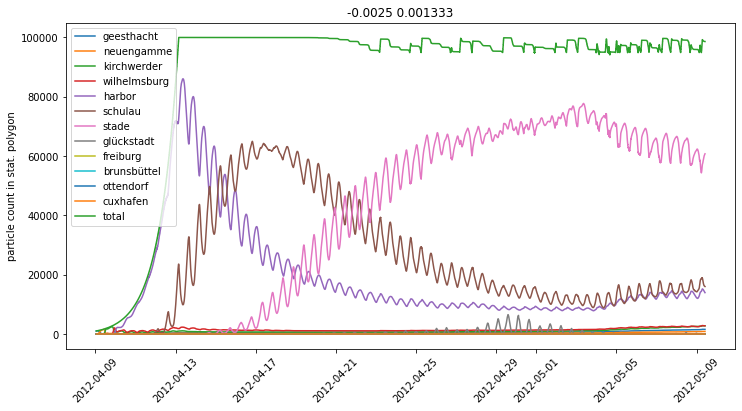

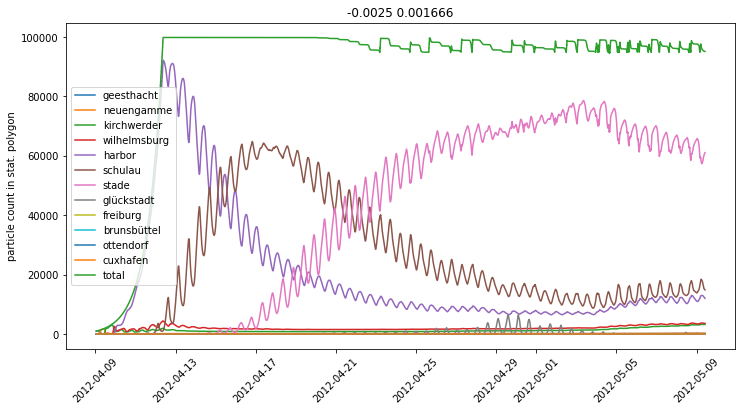

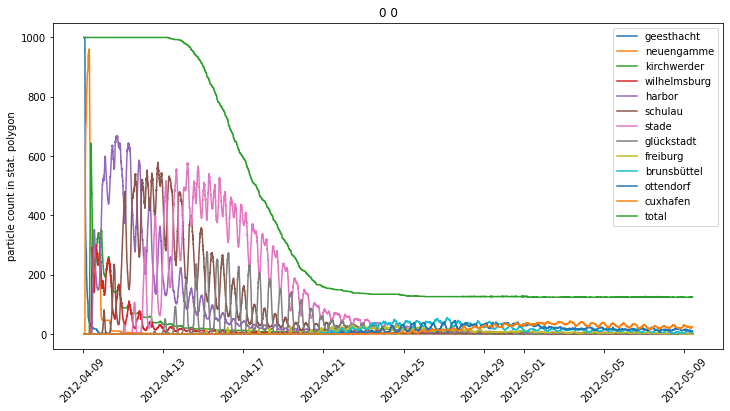

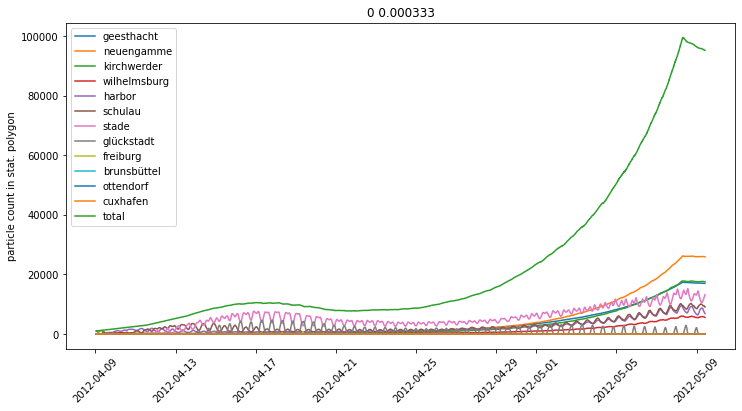

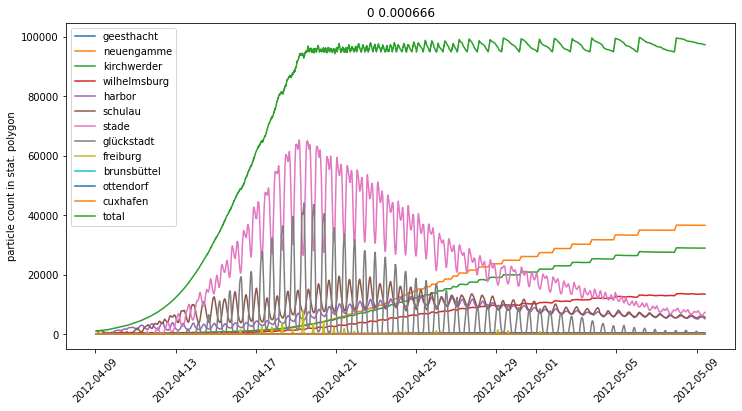

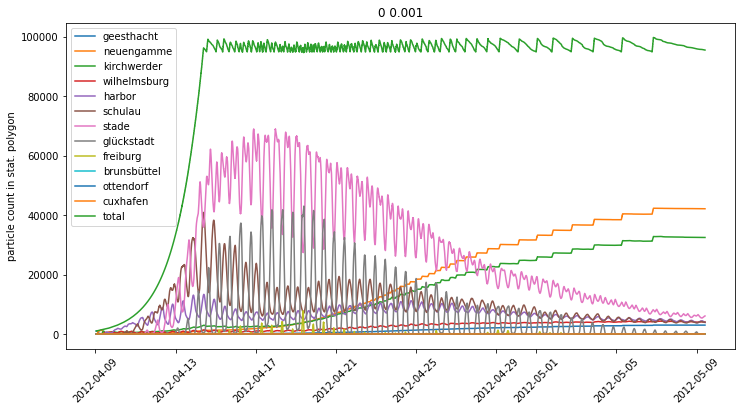

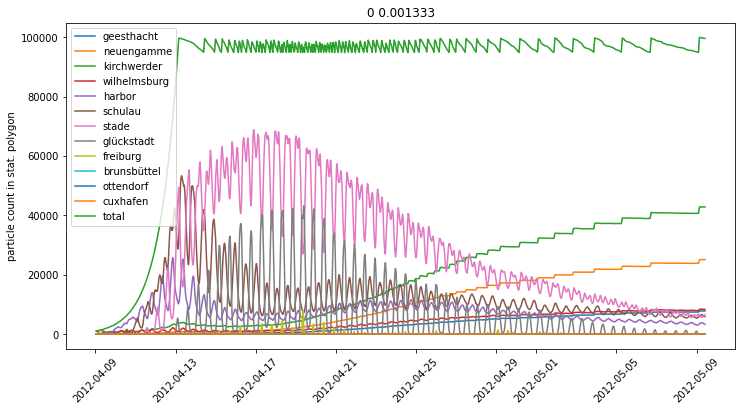

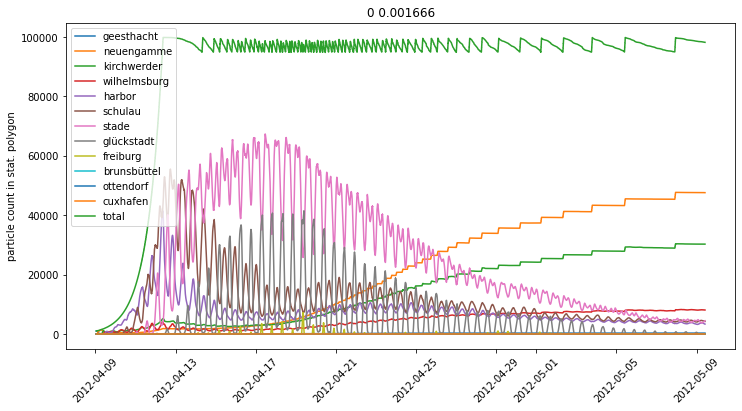

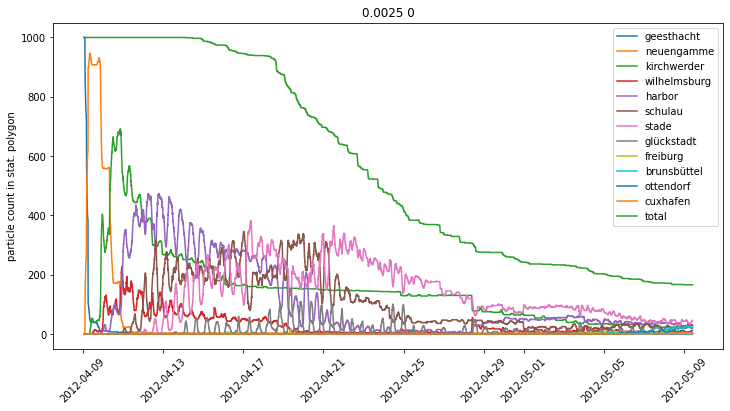

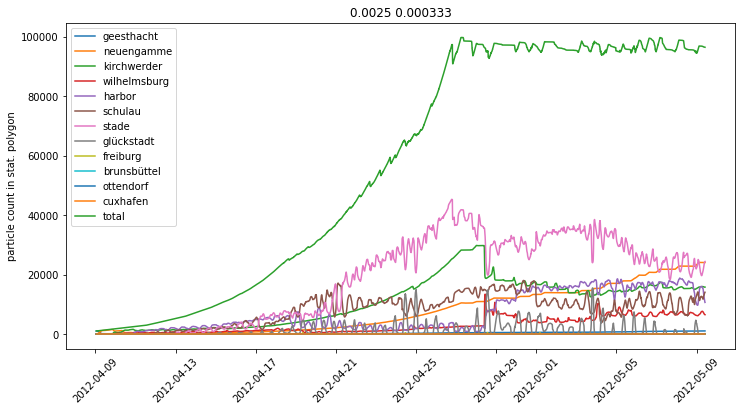

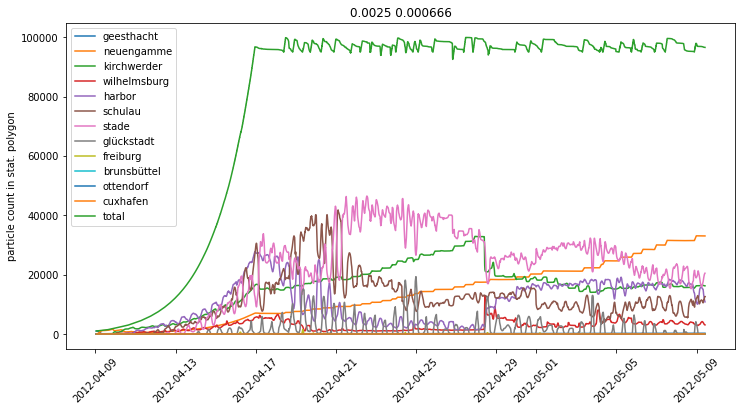

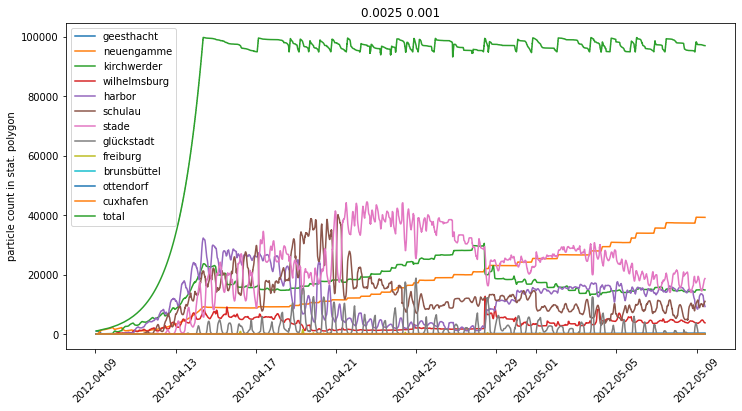

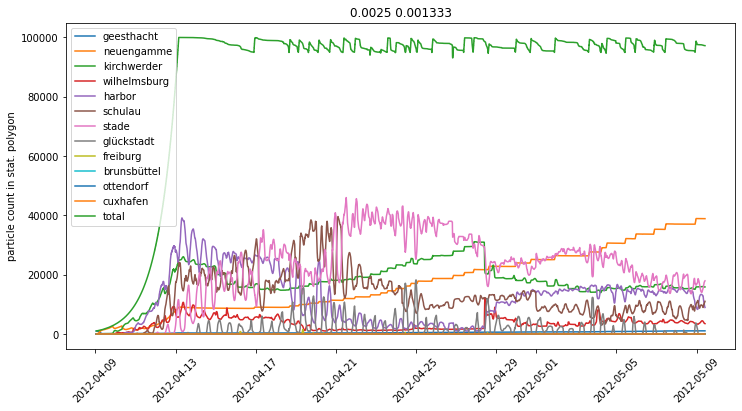

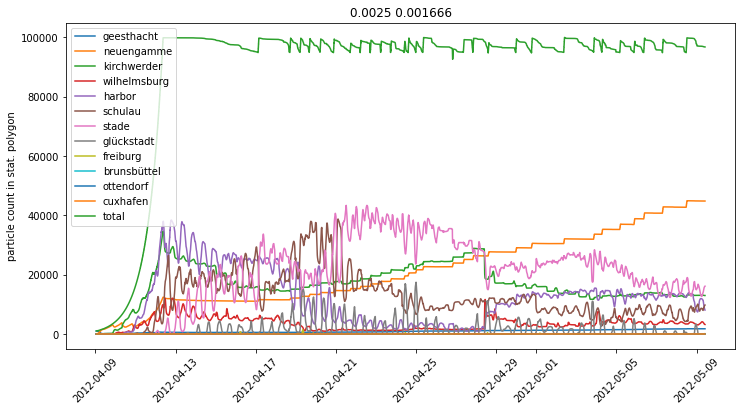

In [71]:
%matplotlib inline
poly_range = (0,12)

for item in df:

    plot_total_polycount(df[item],title=str(velo)+' '+str(ratio))
    

## 21.11 SA v1 - sadly the v0 has been overwritten. however the plots are still above

In [3]:
def load_multicase_msb_stats(path_runInfo):

    runInfo = loadOutputFiles.load_runInfo(path)
    #print(list(runInfo['caseInfo']))
    multicase_df = {}
    #print(len(runInfo['user_params']['case_list']))
    #print(len(runInfo['caseInfo']))
    for ii,caseInfo in enumerate(runInfo['caseInfo'][::runInfo['replicates']]):
        print(ii,caseInfo['info']['user_onfly_particle_statistics'][0]['output_file'])
        run_name = runInfo['output_files']['caseInfo'][::runInfo['replicates']][ii][-20:-14]
        runCaseInfo = copy.deepcopy(runInfo)
        runCaseInfo['caseInfo'] = caseInfo

        m = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=0)
        s = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=1)
        b = loadOutputFiles.load_stats_file(runCaseInfo,nsequence=2)

        polygon_names = []
        for item in m['info']['polygon_list']:
            polygon_names.append(item['__comment'])
        
        singlecase_df = {'time': m['time'],
            'm': m['count'],
            's': s['count'],
            'b': b['count'],
            'polygon_names': polygon_names,
            'case_properties': runInfo['user_params']['case_list'][ii]}
        
        print(singlecase_df['case_properties']["user_class_lists"]['user_velocity_modifiers'][0]['mean'])
        print(singlecase_df['case_properties']["user_class_lists"]['user_trajectory_modifiers'][1]['fraction_to_split'])

        multicase_df[run_name] = singlecase_df

    return multicase_df

In [4]:
def plot_sa_total_polycount(df,sa_shape,title='',poly_range=(0,12)):


    cases = [df[item] for item in df]
    fig,ax = plt.subplots(sa_shape[0],sa_shape[1],sharex=True,figsize=(12,6))

    kk = 0

    for kk in range(sa_shape[0]):
        for jj in range(sa_shape[1]):
            print(kk*sa_shape[0]+jj,kk,jj)
            case = cases[sa_shape[0]*kk+jj]
            velo = case['case_properties']["user_class_lists"]['user_velocity_modifiers'][0]['mean']
            ratio = case['case_properties']["user_class_lists"]['user_trajectory_modifiers'][1]['fraction_to_split']
            total = case['m'] + case['s'] + case['b']
            for ii in np.arange(poly_range[0],poly_range[1]):
                ax[kk][jj].plot(case['time'].astype('datetime64[s]'),total[:,0,ii],label=case['polygon_names'][ii])
            ax[kk][jj].plot(case['time'].astype('datetime64[s]'),np.sum(total[:,0,:],axis=1),label='total')
            ax[kk][jj].set_title(str(velo)+' '+str(ratio))

    #for label in ax.xaxis.get_ticklabels():
    #        label.set_rotation(45)

    plt.tight_layout()
    plt.show()


In [5]:
path = '/scratch/local1/output/21_10_13_sa_verticle_spawning_v00/21_10_13_sa_verticle_spawning_v00_runInfo.json'

In [6]:
df = load_multicase_msb_stats(path)

0 21_10_13_sa_verticle_spawning_v00_C00R00_stats_polygon_time_00.nc
-0.01
0
1 21_10_13_sa_verticle_spawning_v00_C01R00_stats_polygon_time_00.nc
-0.01
3.33e-05
2 21_10_13_sa_verticle_spawning_v00_C02R00_stats_polygon_time_00.nc
-0.01
6.66e-05
3 21_10_13_sa_verticle_spawning_v00_C03R00_stats_polygon_time_00.nc
-0.01
0.0001
4 21_10_13_sa_verticle_spawning_v00_C04R00_stats_polygon_time_00.nc
-0.01
0.000333
5 21_10_13_sa_verticle_spawning_v00_C05R00_stats_polygon_time_00.nc
-0.01
0.000666
6 21_10_13_sa_verticle_spawning_v00_C06R00_stats_polygon_time_00.nc
-0.0075
0
7 21_10_13_sa_verticle_spawning_v00_C07R00_stats_polygon_time_00.nc
-0.0075
3.33e-05
8 21_10_13_sa_verticle_spawning_v00_C08R00_stats_polygon_time_00.nc
-0.0075
6.66e-05
9 21_10_13_sa_verticle_spawning_v00_C09R00_stats_polygon_time_00.nc
-0.0075
0.0001
10 21_10_13_sa_verticle_spawning_v00_C10R00_stats_polygon_time_00.nc
-0.0075
0.000333
11 21_10_13_sa_verticle_spawning_v00_C11R00_stats_polygon_time_00.nc
-0.0075
0.000666
12 21_10

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 0 5
6 0 6
6 1 0
7 1 1
8 1 2
9 1 3
10 1 4
11 1 5
12 1 6
12 2 0
13 2 1
14 2 2
15 2 3
16 2 4
17 2 5
18 2 6
18 3 0
19 3 1
20 3 2
21 3 3
22 3 4
23 3 5
24 3 6
24 4 0
25 4 1
26 4 2
27 4 3
28 4 4
29 4 5
30 4 6
30 5 0
31 5 1
32 5 2
33 5 3
34 5 4
35 5 5
36 5 6


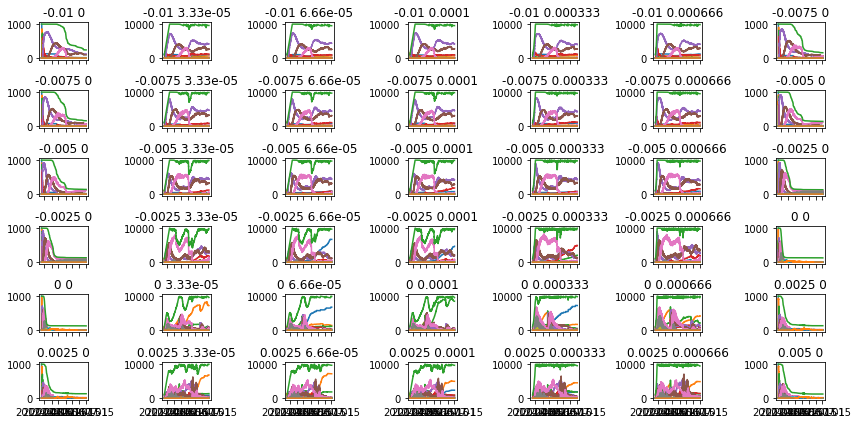

In [9]:
%matplotlib inline
plot_sa_total_polycount(df,(6,7))

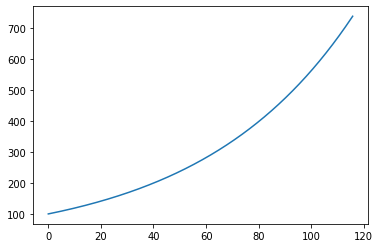

In [50]:
t = np.arange(0,1e7,100)
x = np.zeros(len(t))
x[0] = 100

for ii in np.arange(len(t)-1):
    x[ii+1] = x[ii]+x[ii]*1e-5*2
plt.plot(t/86400,x)

In [52]:
    %matplotlib widget

    poly_range = (0,12)
    cases = [df[item] for item in df]

    fig,ax = plt.subplots(1,1,figsize=(12,6))
    case = cases[2]
    velo = case['case_properties']["user_class_lists"]['user_velocity_modifiers'][0]['mean']
    ratio = case['case_properties']["user_class_lists"]['user_trajectory_modifiers'][1]['fraction_to_split']
    total = case['m'] + case['s'] + case['b']
    for ii in np.arange(poly_range[0],poly_range[1]):
        ax.plot(case['time'].astype('datetime64[s]'),total[:,0,ii],label=case['polygon_names'][ii])
    ax.plot(case['time'].astype('datetime64[s]'),np.sum(total[:,0,:],axis=1),label='total')
    ax.set_title(str(velo)+' '+str(ratio))

    #for label in ax.xaxis.get_ticklabels():
    #        label.set_rotation(45)

    plt.tight_layout()
    plt.show()

## dev diurnal sinkin raising

In [39]:
from numpy import array
from solarpy import solar_panel
from datetime import datetime

panel = solar_panel(1, 1, id_name='NYC_xmas')  # surface, efficiency and name
panel.set_orientation(array([0, 0, -1]))  # upwards
panel.set_position(40.73, -73.93, 0)  # NYC latitude, longitude, altitude
panel.set_datetime(datetime.fromtimestamp(86400/2))  # Christmas Day!
panel.power()

275.9348531883728

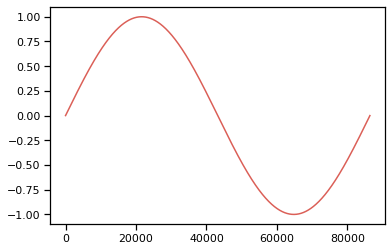

In [59]:
%matplotlib inline
day_in_sec = 86400
t = np.arange(0,day_in_sec)
plt.plot(np.sin(t/day_in_sec*2*np.pi))

In [60]:
day_in_sec = 86400
t = np.arange(1483230600.0,1483230600.0+3*day_in_sec,1)
t = datetime.fromtimestamp(t,)

# make this properly with time zones and datetimes
phase_sun = t%day_in_sec



In [70]:
import datetime
datetime.timezone

datetime.timezone

In [72]:
from datetime import datetime, tzinfo, timedelta

class CET(tzinfo):
    def utcoffset(self, dt):
        return timedelta(hours=1) + self.dst(dt)

    def dst(self, dt):
        dston = datetime(year=dt.year, month=3, day=20)
        dstoff = datetime(year=dt.year, month=10, day=20)
        if dston <= dt.replace(tzinfo=None) < dstoff:
            return timedelta(hours=1)
        else:
            return timedelta(0)

class UTC(tzinfo):
    def utcoffset(self, dt):
        return timedelta(0)

    def dst(self, dt):
        return timedelta(0)

def from_cet_to_utc(year, month, day, hour, minute):
    cet = datetime(year, month, day, hour, minute, tzinfo=CET())
    utc = cet.astimezone(tz=UTC())
    return '{:%Y-%m-%d:T%H:%MZ}'.format(utc)


print(from_cet_to_utc(year=2017, month=7, day=24, hour=10, minute=30))

2017-07-24:T08:30Z


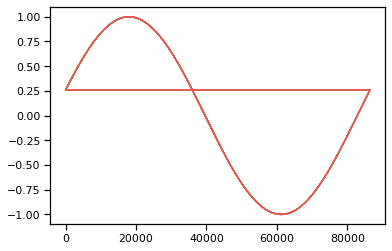

In [77]:
%matplotlib inline
plt.figure()
plt.plot(phase_sun,np.sin( (phase_sun+3600)/day_in_sec*np.pi*2))
plt.show()

In [78]:
def time_dependant_vertical_migration(time,period=86400,phase_shift=3600):
    amplitude = np.sin((time+phase_shift)*2*np.pi/period)
    return amplitude

In [81]:
time_dependant_vertical_migration()

0.0